<a href="https://www.kaggle.com/mrain2/marketing-campaign-prediction?scriptVersionId=82607048" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
#Read and explore the dataset

url = 'https://drive.google.com/file/d/1ZxD4eAR1DK_2ts0u4uxZ1bOtIMnrJ3JJ/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

mktdata = pd.read_csv(dwn_url)
print(mktdata.info())
mktdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4     Income             2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

ID  Year_Birth   Education Marital_Status      Income    Kidhome  \
0   1826        1970  Graduation       Divorced   $84,835.00         0   
1      1        1961  Graduation         Single   $57,091.00         0   
2  10476        1958  Graduation        Married   $67,267.00         0   
3   1386        1967  Graduation       Together   $32,474.00         1   
4   5371        1989  Graduation         Single   $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0   6/16/2014        0       189  ...                  6   
1         0   6/15/2014        0       464  ...                  7   
2         1   5/13/2014        0       134  ...                  5   
3         1   5/11/2014        0        10  ...                  2   
4         0    4/8/2014        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 28 columns]

# **1. DATA CLEANING & ENGINEERING**


In [3]:
# Save dataset in a new DataFrame and keep the original for future usage
mktdata_E = mktdata

#Noticed the column lable " Income " has 2 spaces so I will remove them
mktdata_E.columns = mktdata_E.columns.str.strip(" ")

#reformat the Income variable to float 
mktdata_E['Income'] = mktdata_E['Income'].str.replace('$', '')
mktdata_E['Income'] = mktdata_E['Income'].str.replace(',', '').astype('float')

print(mktdata_E['Dt_Customer'].head())
mktdata_E.info()

0    6/16/2014
1    6/15/2014
2    5/13/2014
3    5/11/2014
4     4/8/2014
Name: Dt_Customer, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


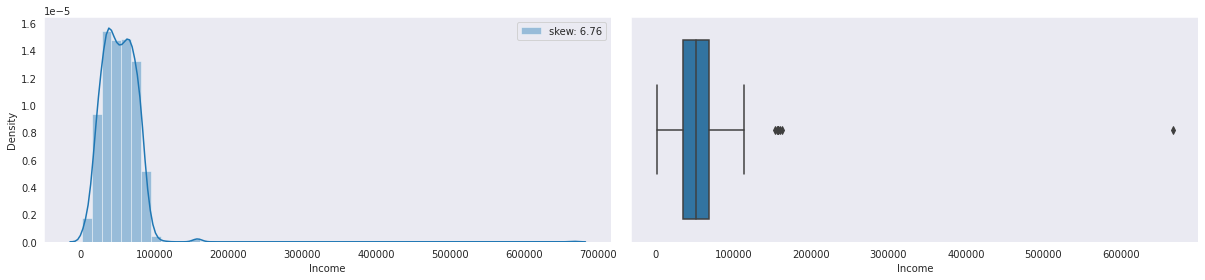

In [4]:
#Noticed Income variable has 24 missing values, I will try to explore the variable to see which method will be used to impuse 
features = ['Income']

sns.set_style('dark')
for col in features:
    plt.figure(figsize=(25,4))
    plt.subplot(131)
    sns.distplot(mktdata_E[col], label="skew: " + str(np.round(mktdata_E[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(mktdata_E[col])

    plt.tight_layout()
    plt.show()

We can see outliners which could make skewness if we impute missing values by mean, instead, we can impute by median

In [5]:
#impute missing values in Income column with the median value
mktdata_E['Income'] = mktdata_E['Income'].fillna(mktdata_E['Income'].median())

In [6]:
mktdata_E.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
for col in ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
  print("% customer accepted the campaign " + col + " is " + str(mktdata_E[col].sum() / len(mktdata_E[col]) *100) + " %")

% customer accepted the campaign AcceptedCmp1 is 6.428571428571428 %
% customer accepted the campaign AcceptedCmp2 is 1.3392857142857142 %
% customer accepted the campaign AcceptedCmp3 is 7.276785714285714 %
% customer accepted the campaign AcceptedCmp4 is 7.455357142857142 %
% customer accepted the campaign AcceptedCmp5 is 7.276785714285714 %


# **Data Engineering**
Since we don't apply time-series analysis so I will transform timedate variables to 'number of years' form

*   Dt_Customer column stores the date and time a people registered as customer --> Convert to number of years as a customer
*   Year_Birth column stores the birth date of each customer --> convert to ages
*   Engineering the total amount of purchases variable
*   Engineering the total amount of products variable

*   Engineering the "ChildHome": '0' means no children, '1' means having children
*   Engineering the "UsedDeal": '0' means Haven't purchased any deal, '1' means have purchased at least 1 deal








In [8]:
# The column Dt_Customer should be stored as date and time type
mktdata_E['Dt_Customer'] = mktdata_E['Dt_Customer'].astype('datetime64[ns]')
# Calculate the number of year as a customer for each row and store in a new column
from datetime import datetime
mktdata_E['Years_as_Cust'] = pd.DatetimeIndex(mktdata_E['Dt_Customer']).year
mktdata_E['Years_as_Cust'] = 2020 - mktdata_E['Years_as_Cust']
print(mktdata['Years_as_Cust'].describe())

count    2240.000000
mean        6.971875
std         0.684554
min         6.000000
25%         7.000000
50%         7.000000
75%         7.000000
max         8.000000
Name: Years_as_Cust, dtype: float64


In [9]:
# Calculate the ages of customers
mktdata_E['Ages'] = 2020 - mktdata_E['Year_Birth']
print(mktdata_E['Ages'].describe())

count    2240.000000
mean       51.194196
std        11.984069
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: Ages, dtype: float64


In [10]:
# Calculate total amount of product purchased and save them into 'MntTotal'
columns_Mnt = ['MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']
mktdata_E['MntTotal'] = mktdata_E[columns_Mnt].sum(axis=1)

In [11]:
# Calculate total purchases and save them into 'TotalPurchases'
columns_pur = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
mktdata_E['TotalPurchases'] = mktdata_E[columns_pur].sum(axis=1)

In [12]:
# Assign new variable "ChildHome" with '0' means no children and '1' means having children
def f(row):
    if row['Kidhome'] + row['Teenhome'] > 0:
        val = 1
    else:
        val = 0
    return val


mktdata_E['ChildHome'] = mktdata_E.apply(f, axis=1)

In [13]:
# Assign a new variable "UsedDeal": '0' means Haven't purchased any deal, '1' means have purchased at least 1 deal
def d(row):
    if row['NumDealsPurchases'] > 0:
        val = 1
    else:
        val = 0
    return val
mktdata_E['UsedDeal'] = mktdata_E.apply(d, axis=1)

In [14]:
mktdata_E.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Response  Complain  \
0  2014-06-16        0       189  ...             0         1         0   
1  2014-06-15        0       464  ...             1         1         0   
2  2014-05-13        0       134  ...             0         0         0   
3  2014-05-11        0        10  ...             0         0         0   
4  2014-04-08        0         6  ...             0         1         0   

   Country  Years_as_Cust  Ages  MntTotal  TotalPurchases  ChildHome  UsedDeal  
0       SP              6    50      1001              15          0         1  
1       CA              6    59       113              18          0         1  
2       US              6    62       117              11          1         1  
3      AUS              6    53         1               4          1         1  
4       SP              6    31        85               8          1         1  

[5 rows x 34 columns]

In [15]:
mktdata_E.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52237.975446     0.444196     0.506250   
std     3246.662198    11.984069   25037.955891     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  AcceptedCmp1  AcceptedCmp2     Response  \
count      2240.000000  ...   2240.000000   2240.000000  2240.000000   
mean         37.525446  ...      0.064286      0.013393     0.149107   
std          54.628979  ...      0.245316      0.114976     0.356274   
min           0.000000  ...      0.000000      0.000000     0.000000   
25%           3.000000  ...      0.000000      0.000000     0.000000   
50%          12.000000  ...      0.000000      0.000000     0.000000   
75%          50.000000  ...      0.000000      0.000000     0.000000   
max         259.000000  ...      1.000000      1.000000     1.000000   

          Complain  Years_as_Cust         Ages    MntTotal  TotalPurchases  \
count  2240.000000    2240.000000  2240.000000  2240.00000     2240.000000   
mean      0.009375       6.971875    51.194196   301.86250       14.862054   
std       0.096391       0.684554    11.984069   338.26463        7.677173   
min       0.000000       6.000000    24.000000     1.00000        0.000000   
25%       0.000000       7.000000    43.000000    42.00000        8.000000   
50%       0.000000       7.000000    50.000000   142.50000       15.000000   
75%       0.000000       7.000000    61.000000   486.25000       21.000000   
max       1.000000       8.000000   127.000000  1729.00000       44.000000   

         ChildHome     UsedDeal  
count  2240.000000  2240.000000  
mean      0.715179     0.979464  
std       0.451430     0.141855  
min       0.000000     0.000000  
25%       0.000000     1.000000  
50%       1.000000     1.000000  
75%       1.000000     1.000000  
max       1.000000     1.000000  

[8 rows x 30 columns]

In [16]:
mktdata_E.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# **Identify the outliners & skewness**

In [17]:
mktdata_E.columns.values

array(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response',
       'Complain', 'Country', 'Years_as_Cust', 'Ages', 'MntTotal',
       'TotalPurchases', 'ChildHome', 'UsedDeal'], dtype=object)

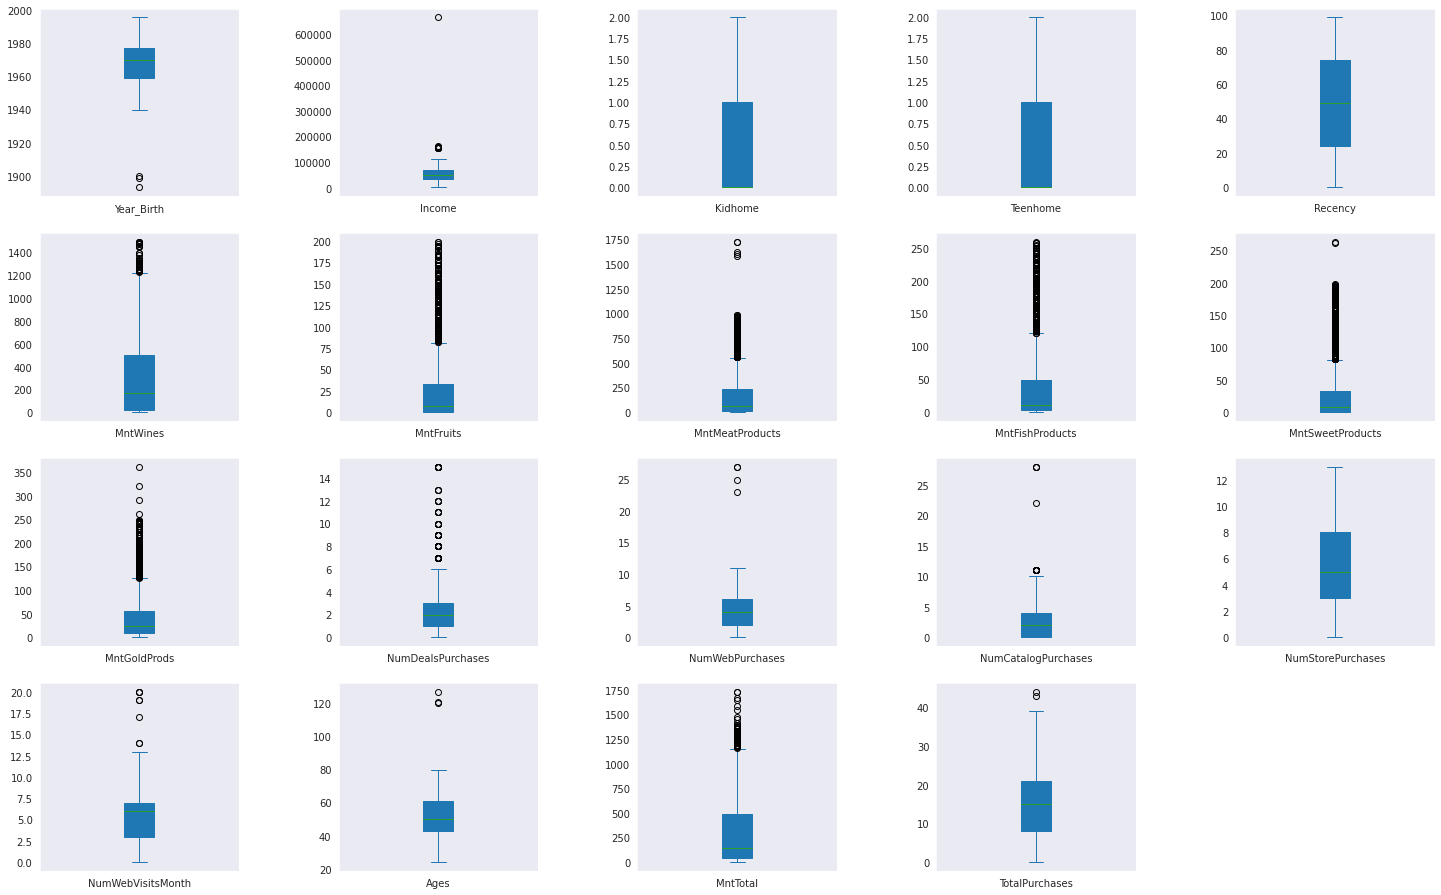

In [18]:
# Select which columns to plot, I eliminate all categorical variables and binary variables
col_to_plot = ['Year_Birth', 'Income',
       'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth',  'Ages', 'MntTotal',
       'TotalPurchases']


# subplots
sns.set_style('dark')
mktdata_E[col_to_plot].plot(subplots=True, layout=(5,5), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [19]:
from scipy.stats import skew

In [20]:
def dist_plot(df, cols):
  sns.set_style('dark')
  plt.figure(figsize=(25,20))
  for i, col in enumerate(cols):
    ax = plt.subplot(5,6, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.text(0.5,0.9,"skew= " + str(round(skew(df[col]),2)), bbox=dict(facecolor='yellow', alpha=0.5), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    plt.xlabel(col)
  plt.show()

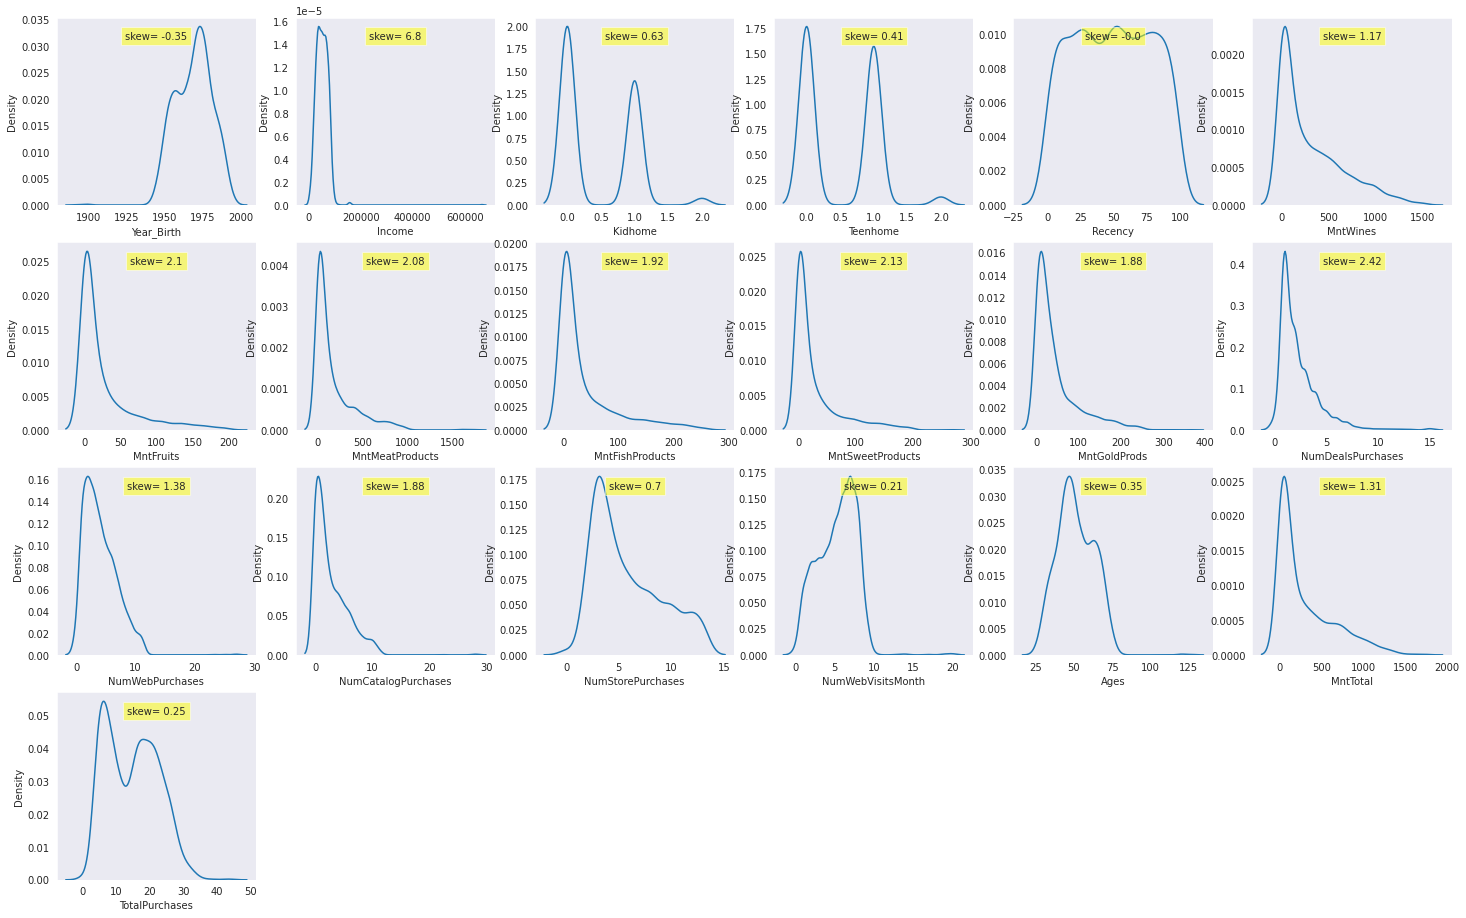

In [21]:
  dist_plot(mktdata_E,col_to_plot)

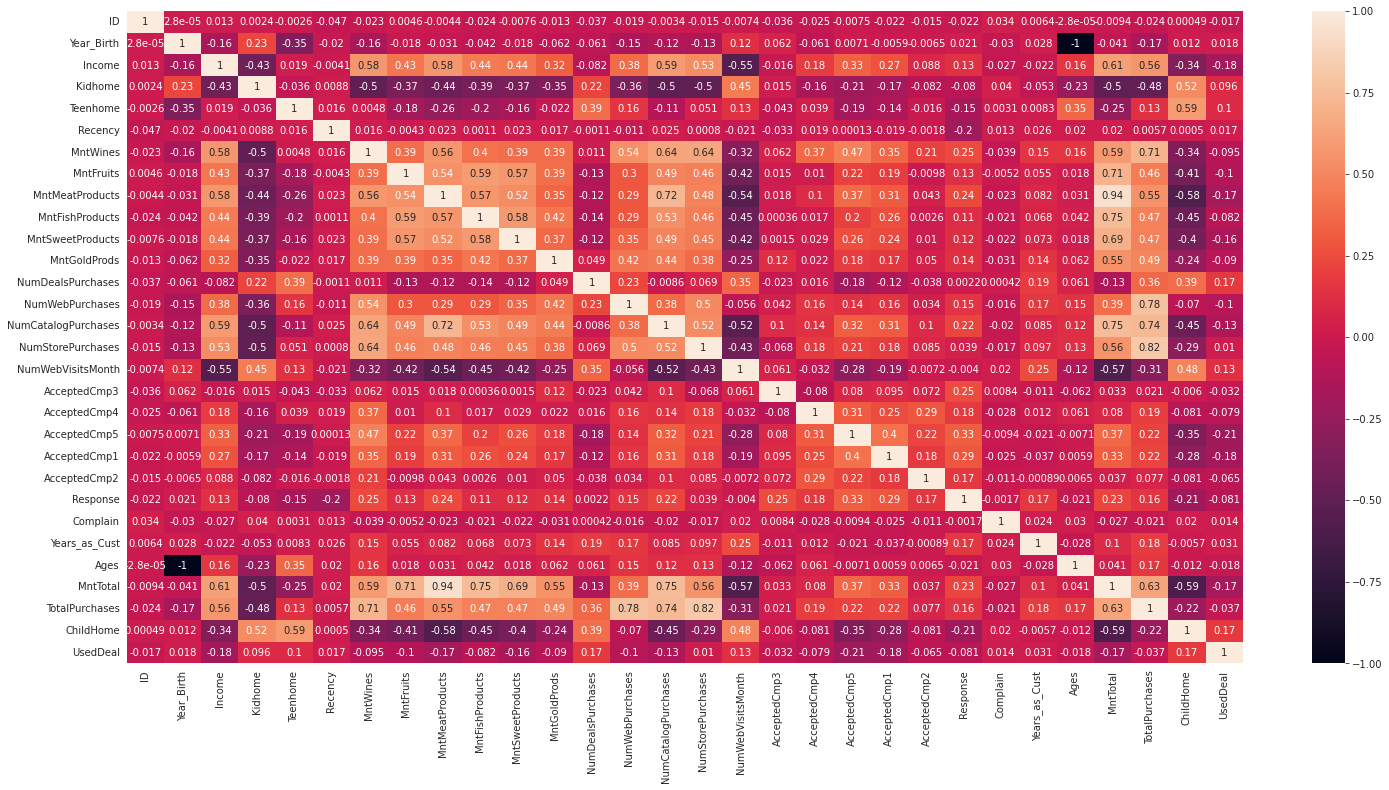

In [22]:
# Look for any correlation
plt.figure(figsize=(25,12))
sns.heatmap(mktdata_E.corr(), annot=True)
plt.show()

In [23]:
# Save the dataset into new DataFrame called mktdata_cap and continue with cap & floor the outliers
mktdata_cap = mktdata_E
features = ['Year_Birth', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Ages', 'MntTotal',
       'TotalPurchases']

In [24]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [25]:
q1 = mktdata_E['Income'].quantile(0.25)
q3 = mktdata_E['Income'].quantile(0.75)
iqr = q3 - q1
upper_whisker = q3 + (1.5*iqr)
lower_whisker = q1 - (1.5*iqr)
print("Income upper_whisker = " + str(round(upper_whisker,2)))
print("Income lower_whisker = " + str(round(lower_whisker,2)))


Income upper_whisker = 117416.25
Income lower_whisker = -13587.75


In [26]:
q1 = mktdata_E['Ages'].quantile(0.25)
q3 = mktdata_E['Ages'].quantile(0.75)
iqr = q3 - q1
upper_whisker = q3 + (1.5*iqr)
lower_whisker = q1 - (1.5*iqr)
print("Ages upper_whisker = " + str(round(upper_whisker,2)))
print("Ages lower_whisker = " + str(round(lower_whisker,2)))

Ages upper_whisker = 88.0
Ages lower_whisker = 16.0


In [27]:
iqr_capping(mktdata_cap, features, 1.5)


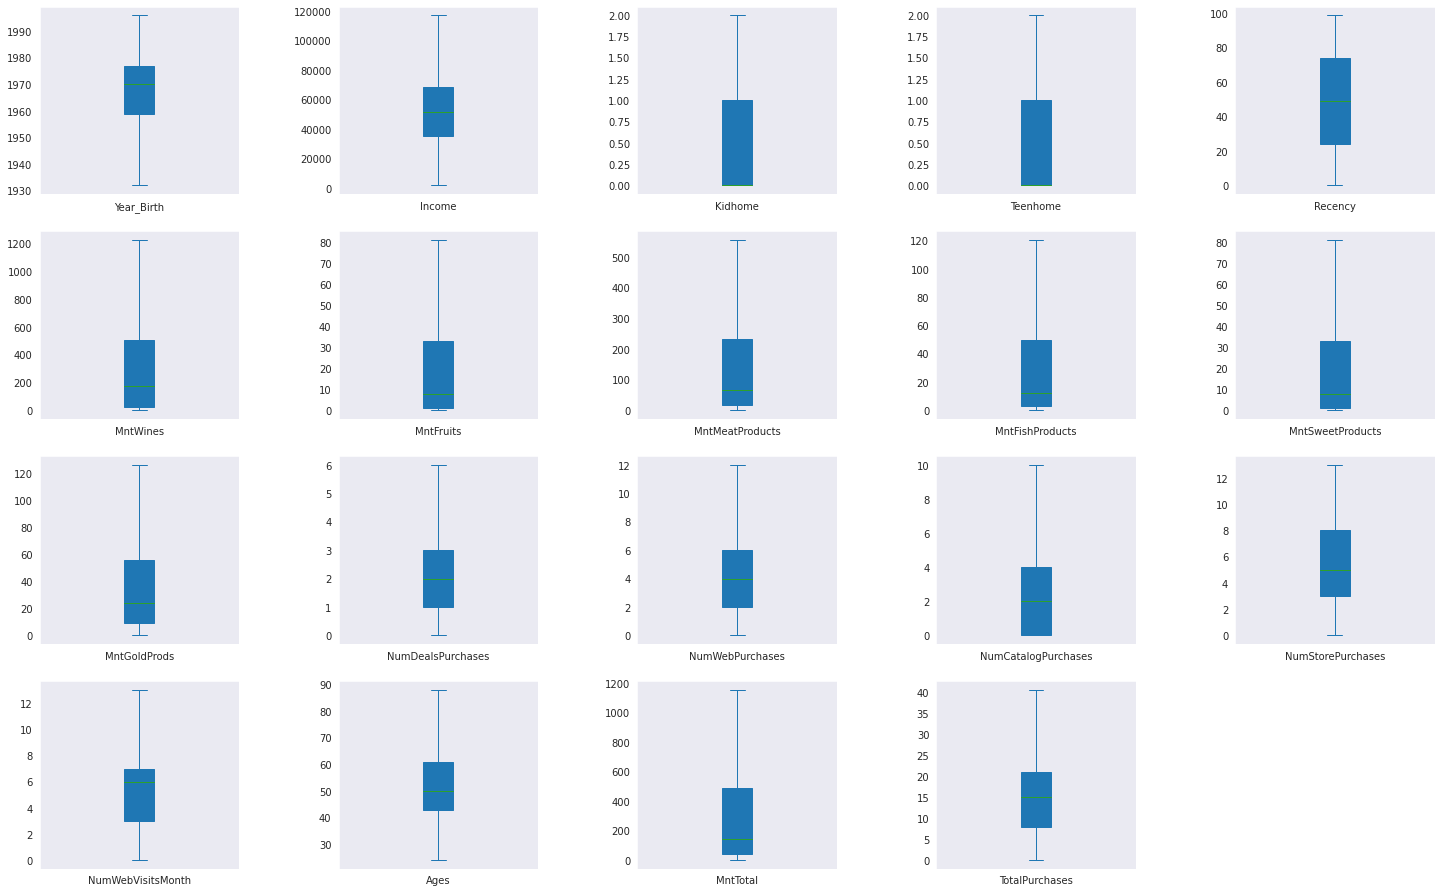

In [28]:
sns.set_style('dark')
mktdata_cap[col_to_plot].plot(subplots=True, layout=(5,5), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

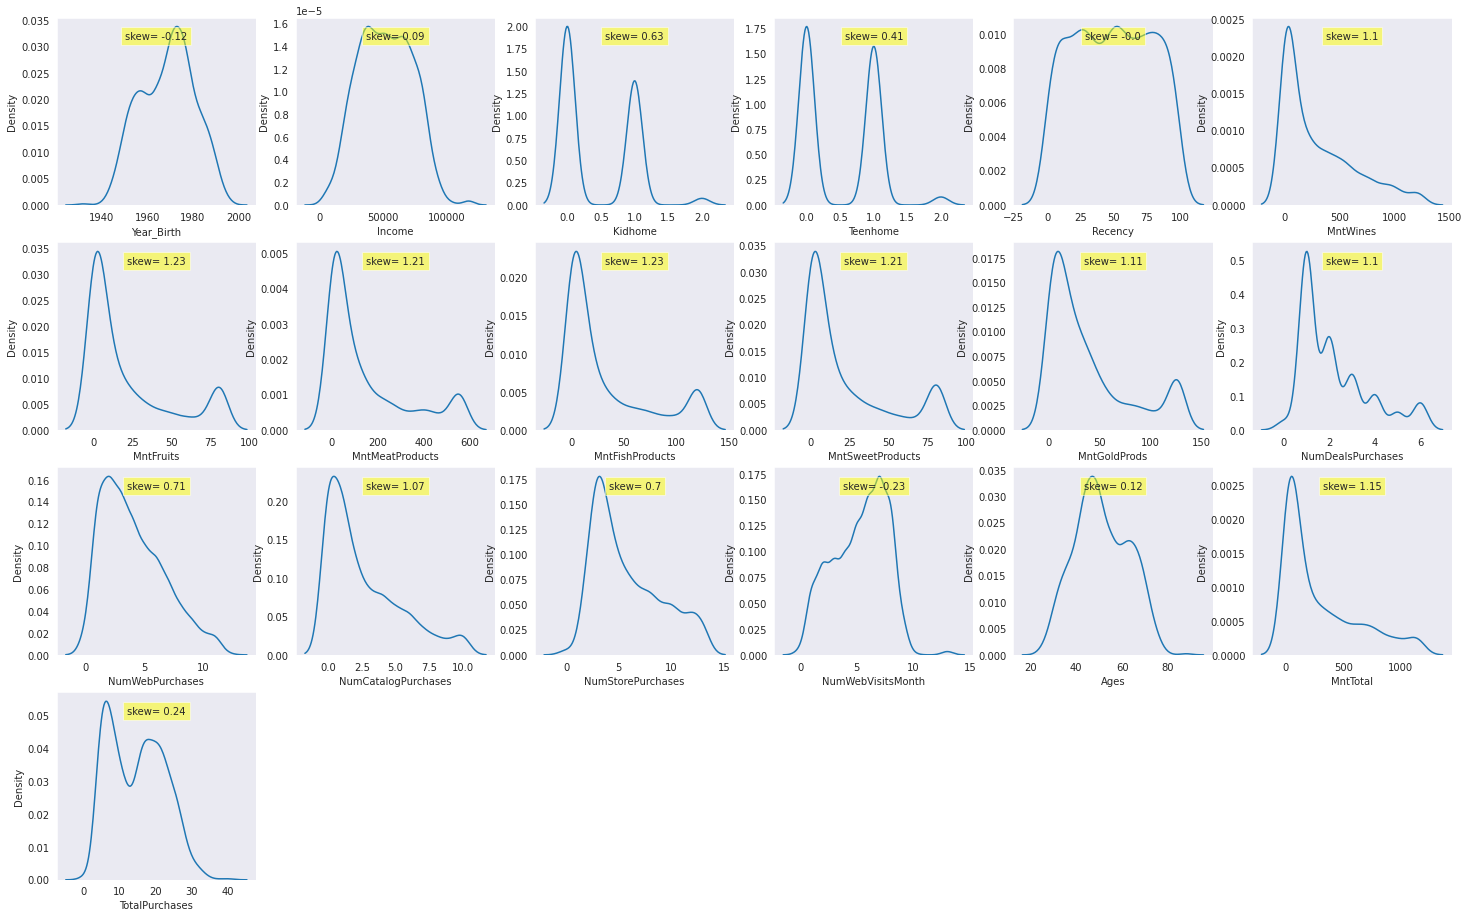

In [29]:
dist_plot(mktdata_cap, col_to_plot)

In [30]:
mktdata_cap

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826      1970.0  Graduation       Divorced  84835.0        0   
1         1      1961.0  Graduation         Single  57091.0        0   
2     10476      1958.0  Graduation        Married  67267.0        0   
3      1386      1967.0  Graduation       Together  32474.0        1   
4      5371      1989.0  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142      1976.0         PhD       Divorced  66476.0        0   
2236   5263      1977.0    2n Cycle        Married  31056.0        1   
2237     22      1976.0  Graduation       Divorced  46310.0        1   
2238    528      1978.0  Graduation        Married  65819.0        0   
2239   4070      1969.0         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Response  \
0            0  2014-06-16      0.0     189.0  ...             0         1   
1            0  2014-06-15      0.0     464.0  ...             1         1   
2            1  2014-05-13      0.0     134.0  ...             0         0   
3            1  2014-05-11      0.0      10.0  ...             0         0   
4            0  2014-04-08      0.0       6.0  ...             0         1   
...        ...         ...      ...       ...  ...           ...       ...   
2235         1  2013-03-07     99.0     372.0  ...             0         0   
2236         0  2013-01-22     99.0       5.0  ...             0         0   
2237         0  2012-12-03     99.0     185.0  ...             0         0   
2238         0  2012-11-29     99.0     267.0  ...             0         0   
2239         2  2012-09-01     99.0     169.0  ...             0         1   

      Complain  Country  Years_as_Cust  Ages  MntTotal  TotalPurchases  \
0            0       SP              6  50.0    1001.0            15.0   
1            0       CA              6  59.0     113.0            18.0   
2            0       US              6  62.0     117.0            11.0   
3            0      AUS              6  53.0       1.0             4.0   
4            0       SP              6  31.0      85.0             8.0   
...        ...      ...            ...   ...       ...             ...   
2235         0       US              7  44.0     317.0            20.0   
2236         0       SP              7  43.0      50.0             5.0   
2237         0       SP              8  44.0     124.0            14.0   
2238         0      IND              8  42.0    1116.0            20.0   
2239         0       CA              8  51.0     909.0            18.0   

      ChildHome  UsedDeal  
0             0         1  
1             0         1  
2             1         1  
3             1         1  
4             1         1  
...         ...       ...  
2235          1         1  
2236          1         1  
2237          1         1  
2238          0         1  
2239          1         1  

[2240 rows x 34 columns]

Code for log transformation

col_to_transform = mktdata.drop(columns=['ID', 'Education', 'Marital_Status', 'Dt_Customer', 'Kidhome', 'Teenhome',
                                      'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain',
                                     'Country'])

for i,col in enumerate(col_to_transform.columns):
  mktdata[col] = np.log(1 + mktdata[col])

# **Apply Standard Scaler to reduce skewness**

In [31]:
#Standardize skewed variables
from sklearn.preprocessing import StandardScaler
columns_scaled = ['Year_Birth', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth',  'Ages', 'MntTotal',
       'TotalPurchases', 'Years_as_Cust']

scalar = StandardScaler()
mktdata_scaled = pd.DataFrame(scalar.fit_transform(mktdata_cap[columns_scaled]), columns=columns_scaled, index=mktdata_cap.index)
mktdata_scaled

Year_Birth    Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0       0.097524  1.575101 -1.696001 -0.341748   2.176816         1.276043   
1      -0.667191  0.249631 -1.696001  0.489109  -0.612046        -0.485931   
2      -0.922096  0.735789 -1.696001 -0.507919  -0.391872        -0.513899   
3      -0.157381 -0.926448 -1.696001 -0.882561  -0.795523        -0.838326   
4       1.711921 -1.451973 -1.696001 -0.894646  -0.208395        -0.709674   
...          ...       ...       ...       ...        ...              ...   
2235    0.607334  0.697999  1.722981  0.211150  -0.135004        -0.139130   
2236    0.692302 -0.994193  1.722981 -0.897667  -0.428568        -0.771203   
2237    0.607334 -0.265432  1.722981 -0.353833  -0.722132        -0.351686   
2238    0.777270  0.666611  1.722981 -0.106087   0.598907         2.266105   
2239    0.012556  2.054572  1.722981 -0.402174   0.085170         2.249324   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0            1.954878          2.145044      2.179743          -0.790225   
1           -0.622412         -0.796753     -0.062320          -0.790225   
2           -0.424159         -0.724116     -0.237677          -0.790225   
3           -0.795883         -0.796753     -0.989206          -0.790225   
4           -0.523285         -0.796753     -0.137473          -0.140168   
...               ...               ...           ...                ...   
2235         0.368854          0.946534      0.964770          -0.140168   
2236        -0.721538         -0.506205     -0.588391          -0.790225   
2237        -0.424159         -0.615161     -0.638493          -0.140168   
2238         2.190303          2.145044      0.589006          -0.790225   
2239         2.190303         -0.796753      2.179743          -0.790225   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           -0.022939             0.503222           0.064556   
1            1.110530             0.137480           0.372226   
2           -0.400762            -0.228262          -0.243114   
3           -1.156408            -0.959746          -1.166125   
4           -0.400762            -0.594004          -1.166125   
...               ...                  ...                ...   
2235         0.354884            -0.228262           1.602907   
2236        -1.156408            -0.959746          -0.858455   
2237         0.732707            -0.594004          -0.243114   
2238         0.354884             0.503222           1.295237   
2239         1.488353             0.868964          -0.550785   

      NumWebVisitsMonth      Ages  MntTotal  TotalPurchases  Years_as_Cust  
0             -1.831096 -0.097524  2.155296        0.018344      -1.420036  
1             -0.127397  0.667191 -0.566680        0.409684      -1.420036  
2             -1.405171  0.922096 -0.554419       -0.503443      -1.420036  
3              0.724452  0.157381 -0.909992       -1.416569      -1.420036  
4              0.724452 -1.711921 -0.652508       -0.894783      -1.420036  
...                 ...       ...       ...             ...            ...  
2235          -0.553322 -0.607334  0.058639        0.670577       0.041094  
2236           1.150377 -0.692302 -0.759793       -1.286123       0.041094  
2237           1.150377 -0.607334 -0.532962       -0.112103       1.502225  
2238          -0.979246 -0.777270  2.507804        0.670577       1.502225  
2239           0.724452 -0.012556  1.873290        0.409684       1.502225  

[2240 rows x 18 columns]

In [32]:
#Adding scaled columns back to dataset
mktdata_scaled = pd.concat([mktdata_scaled, mktdata_cap.drop(axis=1, columns=columns_scaled)],axis=1)

# **Data Transformation**
Before applying any model we need to transform categorical variables into numerical variables using pandas

In [33]:
# Encoding categorical variables using pandas
cat_columns = mktdata_scaled.select_dtypes(exclude = np.number)
print("Number of unique values per categorical feature:\n", cat_columns.nunique())
dummies_cat = pd.get_dummies(cat_columns)

Number of unique values per categorical feature:
 Education           5
Marital_Status      8
Dt_Customer       663
Country             8
dtype: int64


In [34]:
# Add to mktdat_scaled Dataframe and changed the name as mktdata_trf
mktdata_trf = pd.concat([mktdata_scaled,dummies_cat], axis=1)
mktdata_trf = mktdata_trf.drop(columns=cat_columns.columns)
mktdata_trf = mktdata_trf.drop(['ID'], axis=1)
mktdata_trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2240 non-null   float64
 1   Income                   2240 non-null   float64
 2   Recency                  2240 non-null   float64
 3   MntWines                 2240 non-null   float64
 4   MntFruits                2240 non-null   float64
 5   MntMeatProducts          2240 non-null   float64
 6   MntFishProducts          2240 non-null   float64
 7   MntSweetProducts         2240 non-null   float64
 8   MntGoldProds             2240 non-null   float64
 9   NumDealsPurchases        2240 non-null   float64
 10  NumWebPurchases          2240 non-null   float64
 11  NumCatalogPurchases      2240 non-null   float64
 12  NumStorePurchases        2240 non-null   float64
 13  NumWebVisitsMonth        2240 non-null   float64
 14  Ages                    

In [35]:
mktdata_trf

Year_Birth    Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0       0.097524  1.575101 -1.696001 -0.341748   2.176816         1.276043   
1      -0.667191  0.249631 -1.696001  0.489109  -0.612046        -0.485931   
2      -0.922096  0.735789 -1.696001 -0.507919  -0.391872        -0.513899   
3      -0.157381 -0.926448 -1.696001 -0.882561  -0.795523        -0.838326   
4       1.711921 -1.451973 -1.696001 -0.894646  -0.208395        -0.709674   
...          ...       ...       ...       ...        ...              ...   
2235    0.607334  0.697999  1.722981  0.211150  -0.135004        -0.139130   
2236    0.692302 -0.994193  1.722981 -0.897667  -0.428568        -0.771203   
2237    0.607334 -0.265432  1.722981 -0.353833  -0.722132        -0.351686   
2238    0.777270  0.666611  1.722981 -0.106087   0.598907         2.266105   
2239    0.012556  2.054572  1.722981 -0.402174   0.085170         2.249324   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0            1.954878          2.145044      2.179743          -0.790225  ...   
1           -0.622412         -0.796753     -0.062320          -0.790225  ...   
2           -0.424159         -0.724116     -0.237677          -0.790225  ...   
3           -0.795883         -0.796753     -0.989206          -0.790225  ...   
4           -0.523285         -0.796753     -0.137473          -0.140168  ...   
...               ...               ...           ...                ...  ...   
2235         0.368854          0.946534      0.964770          -0.140168  ...   
2236        -0.721538         -0.506205     -0.588391          -0.790225  ...   
2237        -0.424159         -0.615161     -0.638493          -0.140168  ...   
2238         2.190303          2.145044      0.589006          -0.790225  ...   
2239         2.190303         -0.796753      2.179743          -0.790225  ...   

      Marital_Status_Widow  Marital_Status_YOLO  Country_AUS  Country_CA  \
0                        0                    0            0           0   
1                        0                    0            0           1   
2                        0                    0            0           0   
3                        0                    0            1           0   
4                        0                    0            0           0   
...                    ...                  ...          ...         ...   
2235                     0                    0            0           0   
2236                     0                    0            0           0   
2237                     0                    0            0           0   
2238                     0                    0            0           0   
2239                     0                    0            0           1   

      Country_GER  Country_IND  Country_ME  Country_SA  Country_SP  Country_US  
0               0            0           0           0           1           0  
1               0            0           0           0           0           0  
2               0            0           0           0           0           1  
3               0            0           0           0           0           0  
4               0            0           0           0           1           0  
...           ...          ...         ...         ...         ...         ...  
2235            0            0           0           0           0           1  
2236            0            0           0           0           1           0  
2237            0            0           0           0           1           0  
2238            0            1           0           0           0           0  
2239            0            0           0           0           0           0  

[2240 rows x 50 columns]

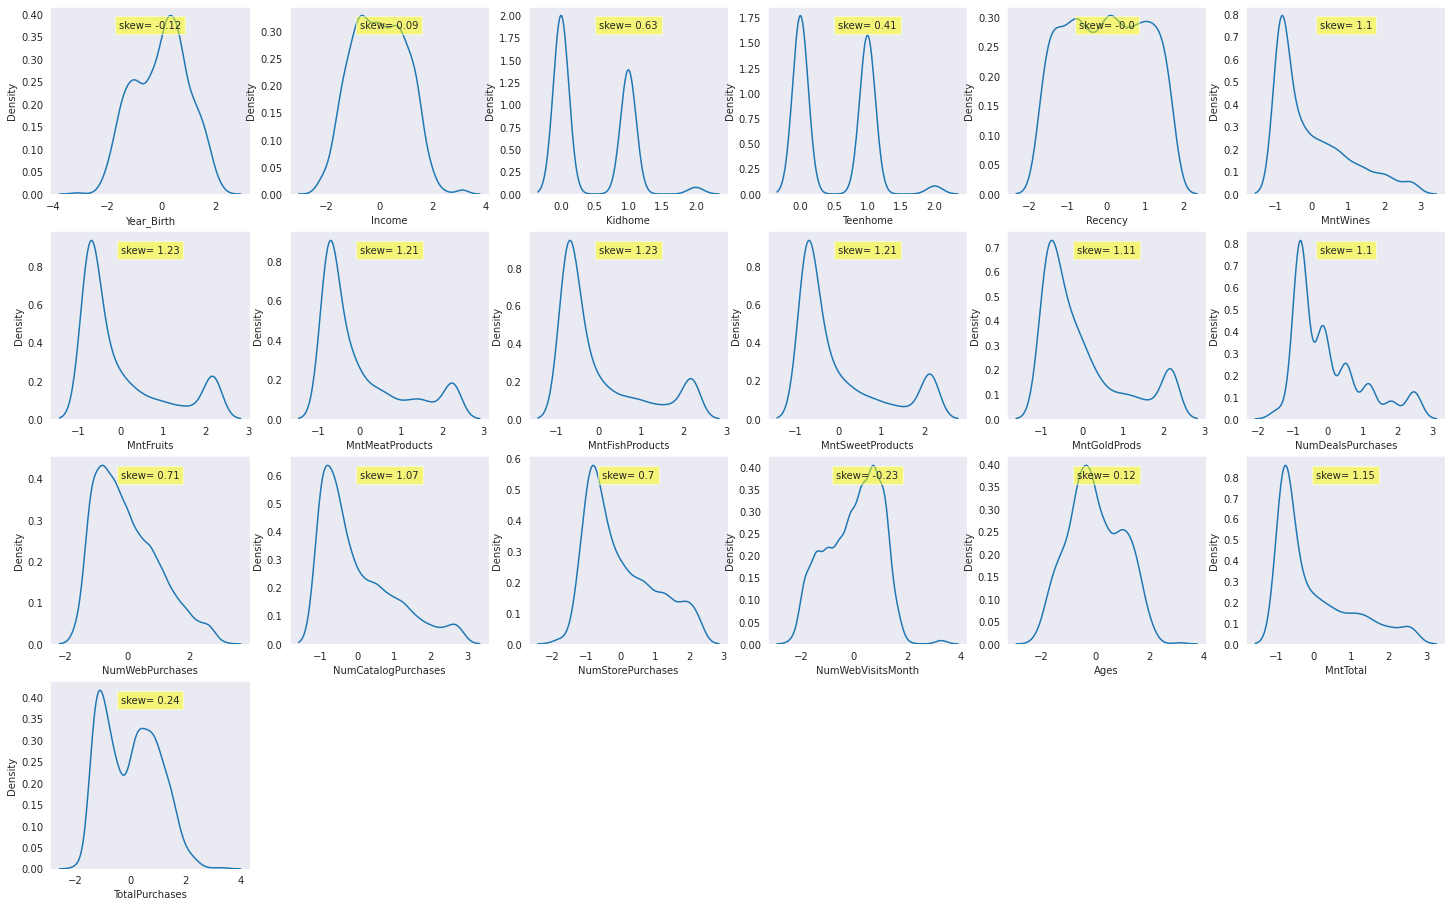

In [36]:
dist_plot(mktdata_trf,col_to_plot)

# **2. Clustering Analysis**

In [37]:
#Apply PCA 
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_red = pca.fit_transform(mktdata_trf)

In [38]:
pca.n_components_

23

In [39]:
pcaSummary = pd.DataFrame({'std_deviation': np.sqrt(pca.explained_variance_),
              'prop_of_variance' : pca.explained_variance_ratio_,
              'cum_prop_var': np.cumsum(pca.explained_variance_ratio_)})
pcaSummary_tps = pcaSummary.transpose()
pcaSummary_tps.columns = ['PC{}'.format(i) for i in range(1,len(pcaSummary_tps.columns) + 1)]
pcaSummary_tps

PC1       PC2       PC3       PC4       PC5       PC6  \
std_deviation     2.859349  1.525958  1.385428  1.018114  0.991215  0.893364   
prop_of_variance  0.383261  0.109156  0.089976  0.048591  0.046057  0.037413   
cum_prop_var      0.383261  0.492417  0.582393  0.630984  0.677041  0.714453   

                       PC7       PC8       PC9      PC10  ...      PC14  \
std_deviation     0.766832  0.726915  0.696565  0.587322  ...  0.554657   
prop_of_variance  0.027565  0.024770  0.022745  0.016170  ...  0.014421   
cum_prop_var      0.742019  0.766789  0.789534  0.805704  ...  0.866067   

                      PC15      PC16      PC17      PC18      PC19      PC20  \
std_deviation     0.540955  0.532935  0.523658  0.481791  0.442803  0.424085   
prop_of_variance  0.013718  0.013314  0.012855  0.010881  0.009191  0.008431   
cum_prop_var      0.879785  0.893099  0.905953  0.916835  0.926026  0.934457   

                      PC21      PC22      PC23  
std_deviation     0.419324  0.367397  0.360121  
prop_of_variance  0.008243  0.006327  0.006079  
cum_prop_var      0.942699  0.949027  0.955106  

[3 rows x 23 columns]

In [40]:
pcacomponents_df = pd.DataFrame(pca.components_.transpose(), columns=pcaSummary_tps.columns,
                                index=mktdata_trf.columns)

In [41]:
pcacomponents_df

PC1       PC2       PC3       PC4       PC5  \
Year_Birth              -0.061811 -0.455093 -0.478027 -0.133339  0.154614   
Income                   0.298503  0.006429  0.116710 -0.155820  0.141694   
Recency                  0.006987  0.010013  0.015231  0.705754  0.698299   
MntWines                 0.270646  0.125116 -0.068766 -0.117393  0.106161   
MntFruits                0.267691 -0.130775 -0.015057  0.120615 -0.125643   
MntMeatProducts          0.304165 -0.138560  0.036923  0.052855 -0.049682   
MntFishProducts          0.273441 -0.140353  0.016845  0.129791 -0.156305   
MntSweetProducts         0.269878 -0.129697 -0.020028  0.124279 -0.098475   
MntGoldProds             0.222371  0.054552 -0.153099  0.133686 -0.116355   
NumDealsPurchases       -0.029955  0.417398 -0.365614 -0.069758  0.120217   
NumWebPurchases          0.213423  0.294793 -0.260342 -0.130468  0.091935   
NumCatalogPurchases      0.299094 -0.010343  0.016200 -0.012019  0.036650   
NumStorePurchases        0.270176  0.117015 -0.087367 -0.171936  0.162975   
NumWebVisitsMonth       -0.215150  0.219728 -0.337625  0.129189 -0.171281   
Ages                     0.061811  0.455093  0.478027  0.133339 -0.154614   
MntTotal                 0.320705 -0.150465  0.007742  0.108217 -0.104187   
TotalPurchases           0.291641  0.242084 -0.206463 -0.145234  0.142551   
Years_as_Cust            0.038849  0.145487 -0.342191  0.491631 -0.480590   
Kidhome                 -0.116357 -0.013794 -0.070983  0.011994  0.013852   
Teenhome                -0.018492  0.218242  0.013907 -0.059773  0.083662   
AcceptedCmp3             0.002241 -0.004856 -0.014840 -0.005671 -0.009758   
AcceptedCmp4             0.015242  0.021595 -0.003499 -0.029021  0.031882   
AcceptedCmp5             0.034549 -0.025327  0.012277 -0.017087  0.010572   
AcceptedCmp1             0.028557 -0.015630  0.006610 -0.016131  0.003467   
AcceptedCmp2             0.003331  0.001635 -0.000605 -0.006051  0.004480   
Response                 0.025945 -0.003413 -0.030566 -0.023406 -0.094358   
Complain                -0.000929  0.000835  0.000532  0.003293 -0.001504   
ChildHome               -0.083822  0.116950 -0.073872 -0.045759  0.064520   
UsedDeal                -0.006464  0.010791 -0.011955  0.000970  0.004396   
Education_2n Cycle      -0.002848 -0.017693 -0.012671  0.010618 -0.013883   
Education_Basic         -0.008175 -0.010796 -0.006973  0.012650 -0.013270   
Education_Graduation     0.010660 -0.031711 -0.027843  0.060054 -0.024129   
Education_Master        -0.001571  0.018565  0.017749 -0.025054  0.008374   
Education_PhD            0.001934  0.041634  0.029738 -0.058269  0.042908   
Marital_Status_Absurd    0.000436 -0.000697 -0.000035  0.000509 -0.000366   
Marital_Status_Alone    -0.000302  0.000283 -0.000406 -0.001638  0.000459   
Marital_Status_Divorced  0.000720  0.015555  0.005732  0.003596 -0.003397   
Marital_Status_Married  -0.003281 -0.002912 -0.017823 -0.032651  0.014744   
Marital_Status_Single   -0.001639 -0.037232 -0.015204  0.005814 -0.000377   
Marital_Status_Together  0.000321  0.011457  0.015377  0.017115  0.000296   
Marital_Status_Widow     0.003852  0.012770  0.013452  0.008242 -0.010316   
Marital_Status_YOLO     -0.000108  0.000775 -0.001092 -0.000986 -0.001042   
Country_AUS             -0.000765  0.002682  0.004944 -0.000225 -0.009127   
Country_CA               0.001867  0.006252  0.002412 -0.016245  0.000777   
Country_GER              0.000858 -0.001251  0.001020  0.002007 -0.002019   
Country_IND             -0.002972 -0.004781 -0.007273  0.000531  0.004718   
Country_ME               0.000267  0.000161 -0.000816 -0.000301 -0.001256   
Country_SA               0.001435 -0.000383 -0.004517 -0.009521  0.012155   
Country_SP              -0.001835 -0.006359  0.008140  0.020344 -0.003766   
Country_US               0.001145  0.003679 -0.003910  0.003410 -0.001484   

                              PC6       PC7       PC8       PC9      PC10  \
Year_Birth              -

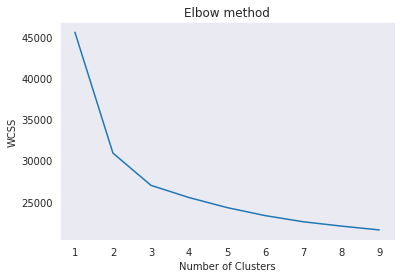

In [42]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

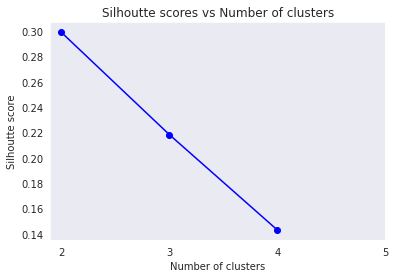

In [43]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X_red, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4, 5])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [44]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.21841228427896534


In [45]:
#adding cluster labels column into dataset
mktdata_E['cluster_id'] = kmeans.labels_
mktdata_trf['cluster_id'] = kmeans.labels_

In [46]:
mktdata_trf = pd.get_dummies(mktdata_trf, columns=['cluster_id'])
mktdata_trf

Year_Birth    Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0       0.097524  1.575101 -1.696001 -0.341748   2.176816         1.276043   
1      -0.667191  0.249631 -1.696001  0.489109  -0.612046        -0.485931   
2      -0.922096  0.735789 -1.696001 -0.507919  -0.391872        -0.513899   
3      -0.157381 -0.926448 -1.696001 -0.882561  -0.795523        -0.838326   
4       1.711921 -1.451973 -1.696001 -0.894646  -0.208395        -0.709674   
...          ...       ...       ...       ...        ...              ...   
2235    0.607334  0.697999  1.722981  0.211150  -0.135004        -0.139130   
2236    0.692302 -0.994193  1.722981 -0.897667  -0.428568        -0.771203   
2237    0.607334 -0.265432  1.722981 -0.353833  -0.722132        -0.351686   
2238    0.777270  0.666611  1.722981 -0.106087   0.598907         2.266105   
2239    0.012556  2.054572  1.722981 -0.402174   0.085170         2.249324   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0            1.954878          2.145044      2.179743          -0.790225  ...   
1           -0.622412         -0.796753     -0.062320          -0.790225  ...   
2           -0.424159         -0.724116     -0.237677          -0.790225  ...   
3           -0.795883         -0.796753     -0.989206          -0.790225  ...   
4           -0.523285         -0.796753     -0.137473          -0.140168  ...   
...               ...               ...           ...                ...  ...   
2235         0.368854          0.946534      0.964770          -0.140168  ...   
2236        -0.721538         -0.506205     -0.588391          -0.790225  ...   
2237        -0.424159         -0.615161     -0.638493          -0.140168  ...   
2238         2.190303          2.145044      0.589006          -0.790225  ...   
2239         2.190303         -0.796753      2.179743          -0.790225  ...   

      Country_CA  Country_GER  Country_IND  Country_ME  Country_SA  \
0              0            0            0           0           0   
1              1            0            0           0           0   
2              0            0            0           0           0   
3              0            0            0           0           0   
4              0            0            0           0           0   
...          ...          ...          ...         ...         ...   
2235           0            0            0           0           0   
2236           0            0            0           0           0   
2237           0            0            0           0           0   
2238           0            0            1           0           0   
2239           1            0            0           0           0   

      Country_SP  Country_US  cluster_id_0  cluster_id_1  cluster_id_2  
0              1           0             1             0             0  
1              0           0             0             1             0  
2              0           1             0             0             1  
3              0           0             0             0             1  
4              1           0             0             0             1  
...          ...         ...           ...           ...           ...  
2235           0           1             0             1             0  
2236           1           0             0             0             1  
2237           1           0             0             0             1  
2238           0           0             1             0             0  
2239           0           0             1             0             0  

[2240 rows x 53 columns]

In [47]:
mktdata_E.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826      1970.0  Graduation       Divorced  84835.0        0         0   
1      1      1961.0  Graduation         Single  57091.0        0         0   
2  10476      1958.0  Graduation        Married  67267.0        0         1   
3   1386      1967.0  Graduation       Together  32474.0        1         1   
4   5371      1989.0  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Response  Complain  Country  \
0  2014-06-16      0.0     189.0  ...         1         0       SP   
1  2014-06-15      0.0     464.0  ...         1         0       CA   
2  2014-05-13      0.0     134.0  ...         0         0       US   
3  2014-05-11      0.0      10.0  ...         0         0      AUS   
4  2014-04-08      0.0       6.0  ...         1         0       SP   

   Years_as_Cust  Ages  MntTotal  TotalPurchases  ChildHome  UsedDeal  \
0              6  50.0    1001.0            15.0          0         1   
1              6  59.0     113.0            18.0          0         1   
2              6  62.0     117.0            11.0          1         1   
3              6  53.0       1.0             4.0          1         1   
4              6  31.0      85.0             8.0          1         1   

   cluster_id  
0           0  
1           1  
2           2  
3           2  
4           2  

[5 rows x 35 columns]

In [48]:
mktdata_E.groupby('cluster_id').mean()

ID   Year_Birth        Income   Kidhome  Teenhome  \
cluster_id                                                               
0           5681.177914  1968.174847  74689.717408  0.052147  0.260736   
1           5428.326460  1964.718213  55657.053265  0.312715  0.890034   
2           5629.248509  1971.682903  34880.177187  0.774354  0.443340   

              Recency    MntWines  MntFruits  MntMeatProducts  \
cluster_id                                                      
0           49.998466  588.058282  52.713190       379.940184   
1           47.828179  438.178694  16.362543       117.515464   
2           49.274354   38.070577   4.641153        21.710736   

            MntFishProducts  ...  AcceptedCmp1  AcceptedCmp2  Response  \
cluster_id                   ...                                         
0                 79.209356  ...      0.187117      0.024540  0.259202   
1                 23.458763  ...      0.036082      0.020619  0.134021   
2                  6.602386  ...      0.000994      0.001988  0.086481   

            Complain  Years_as_Cust       Ages    MntTotal  TotalPurchases  \
cluster_id                                                                   
0           0.007669       6.990798  51.825153  732.925997       21.181748   
1           0.006873       7.176976  55.281787  234.332689       20.323883   
2           0.011928       6.840954  48.317097   52.663643        7.600398   

            ChildHome  UsedDeal  
cluster_id                       
0            0.289877  0.950920  
1            0.919244  0.993127  
2            0.872763  0.990060  

[3 rows x 30 columns]

In [49]:
mktdata_trf

Year_Birth    Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0       0.097524  1.575101 -1.696001 -0.341748   2.176816         1.276043   
1      -0.667191  0.249631 -1.696001  0.489109  -0.612046        -0.485931   
2      -0.922096  0.735789 -1.696001 -0.507919  -0.391872        -0.513899   
3      -0.157381 -0.926448 -1.696001 -0.882561  -0.795523        -0.838326   
4       1.711921 -1.451973 -1.696001 -0.894646  -0.208395        -0.709674   
...          ...       ...       ...       ...        ...              ...   
2235    0.607334  0.697999  1.722981  0.211150  -0.135004        -0.139130   
2236    0.692302 -0.994193  1.722981 -0.897667  -0.428568        -0.771203   
2237    0.607334 -0.265432  1.722981 -0.353833  -0.722132        -0.351686   
2238    0.777270  0.666611  1.722981 -0.106087   0.598907         2.266105   
2239    0.012556  2.054572  1.722981 -0.402174   0.085170         2.249324   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0            1.954878          2.145044      2.179743          -0.790225  ...   
1           -0.622412         -0.796753     -0.062320          -0.790225  ...   
2           -0.424159         -0.724116     -0.237677          -0.790225  ...   
3           -0.795883         -0.796753     -0.989206          -0.790225  ...   
4           -0.523285         -0.796753     -0.137473          -0.140168  ...   
...               ...               ...           ...                ...  ...   
2235         0.368854          0.946534      0.964770          -0.140168  ...   
2236        -0.721538         -0.506205     -0.588391          -0.790225  ...   
2237        -0.424159         -0.615161     -0.638493          -0.140168  ...   
2238         2.190303          2.145044      0.589006          -0.790225  ...   
2239         2.190303         -0.796753      2.179743          -0.790225  ...   

      Country_CA  Country_GER  Country_IND  Country_ME  Country_SA  \
0              0            0            0           0           0   
1              1            0            0           0           0   
2              0            0            0           0           0   
3              0            0            0           0           0   
4              0            0            0           0           0   
...          ...          ...          ...         ...         ...   
2235           0            0            0           0           0   
2236           0            0            0           0           0   
2237           0            0            0           0           0   
2238           0            0            1           0           0   
2239           1            0            0           0           0   

      Country_SP  Country_US  cluster_id_0  cluster_id_1  cluster_id_2  
0              1           0             1             0             0  
1              0           0             0             1             0  
2              0           1             0             0             1  
3              0           0             0             0             1  
4              1           0             0             0             1  
...          ...         ...           ...           ...           ...  
2235           0           1             0             1             0  
2236           1           0             0             0             1  
2237           1           0             0             0             1  
2238           0           0             1             0             0  
2239           0           0             1             0             0  

[2240 rows x 53 columns]

# **Based on the demographic of each group, I try to label them as their characteristics**

1.   Cluster_id = 0: Low income & less spending = L&L
2.   Cluster_id = 1: High income & Loyal = H&H
1.   Cluster_id = 2: Medium income & medium speding = M&M 

In [50]:
#change label name of cluster_id
mktdata_E = mktdata.assign(cluster_cat=pd.cut(mktdata['cluster_id'], 
                               bins=[-1, 0.5, 1.5, 2.5], 
                               labels=['H&H', 'M&M', 'L&L']))
mktdata_E.head()


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826      1970.0  Graduation       Divorced  84835.0        0         0   
1      1      1961.0  Graduation         Single  57091.0        0         0   
2  10476      1958.0  Graduation        Married  67267.0        0         1   
3   1386      1967.0  Graduation       Together  32474.0        1         1   
4   5371      1989.0  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Complain  Country  Years_as_Cust  Ages  \
0  2014-06-16      0.0     189.0  ...         0       SP              6  50.0   
1  2014-06-15      0.0     464.0  ...         0       CA              6  59.0   
2  2014-05-13      0.0     134.0  ...         0       US              6  62.0   
3  2014-05-11      0.0      10.0  ...         0      AUS              6  53.0   
4  2014-04-08      0.0       6.0  ...         0       SP              6  31.0   

   MntTotal  TotalPurchases  ChildHome  UsedDeal  cluster_id  cluster_cat  
0    1001.0            15.0          0         1           0          H&H  
1     113.0            18.0          0         1           1          M&M  
2     117.0            11.0          1         1           2          L&L  
3       1.0             4.0          1         1           2          L&L  
4      85.0             8.0          1         1           2          L&L  

[5 rows x 36 columns]

In [51]:
# Partition and transform data before modeling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
r_state = 3


# isolate X and y variables, and perform train-test split
X = mktdata_trf.drop(['Response'], axis=1)
y = mktdata_trf['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


# **3. Applying Modeling to predict Campaign Response**

# **Logistic regression**

In [52]:
# Logistic regression model
lored = LogisticRegression(C=1e9,solver='liblinear')
lored.fit(X_train, y_train)

# predictions
y_pred_lored = lored.predict(X_test)

# evaluate model using RMSE
print("Logistic regression model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lored)))
print("Median value of target variable: ", y.median())

Logistic regression model RMSE:  0.3535533905932738
Median value of target variable:  0.0


In [53]:
# import the metrics class
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred_lored)
cm

array([[447,  14],
       [ 56,  43]])

Text(0.5, 257.44, 'Predicted label')

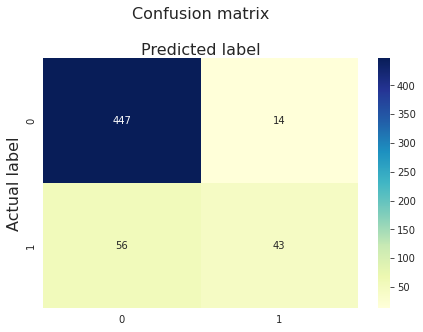

In [54]:
cls_names=[0,1] # name  of classes
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [55]:
# Print accuracy, Precision, Recall and F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lored))
print("Precision:",metrics.precision_score(y_test, y_pred_lored, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred_lored, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred_lored, average="binary"))

Accuracy: 0.875
Precision: 0.7543859649122807
Recall: 0.43434343434343436
F1 Score: 0.5512820512820513


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, 'Country_ME'),
  Text(1, 0, 'Marital_Status_Absurd'),
  Text(2, 0, 'AcceptedCmp3'),
  Text(3, 0, 'AcceptedCmp2'),
  Text(4, 0, 'AcceptedCmp5'),
  Text(5, 0, 'AcceptedCmp4'),
  Text(6, 0, 'AcceptedCmp1'),
  Text(7, 0, 'Marital_Status_Alone'),
  Text(8, 0, 'NumCatalogPurchases'),
  Text(9, 0, 'NumDealsPurchases'),
  Text(10, 0, 'Education_PhD'),
  Text(11, 0, 'NumWebPurchases'),
  Text(12, 0, 'NumWebVisitsMonth'),
  Text(13, 0, 'Years_as_Cust'),
  Text(14, 0, 'Kidhome'),
  Text(15, 0, 'Education_Master'),
  Text(16, 0, 'MntMeatProducts'),
  Text(17, 0, 'Income'),
  Text(18, 0, 'NumStorePurchases'),
  Text(19, 0, 'UsedDeal'),
  Text(20, 0, 'MntFruits'),
  Text(21, 0, 'MntTotal'),
  Text(22, 0, 'MntGoldProds'),
  Text(23, 0, 'Ages'),
  Tex

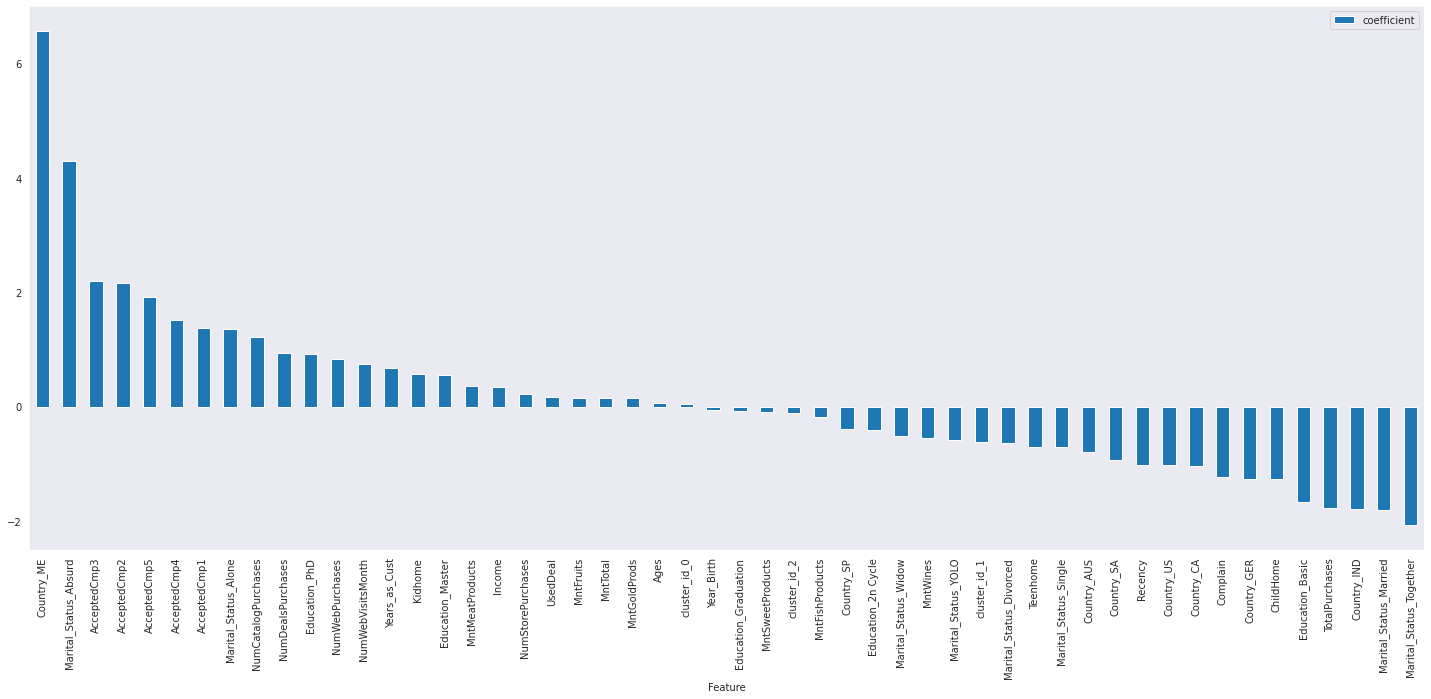

In [56]:
#Create DataFrame of coefficient
coefficient = pd.DataFrame({'Feature': X_train.columns, 'coefficient' : lored.coef_[0]})
coefficient = coefficient.sort_values(by=['coefficient'],ascending=False)

# plot the coefficient 
ax = coefficient.plot.bar(x='Feature', y='coefficient', figsize=(25,10),rot=0)
plt.xticks(rotation=90)

# **Decision Tree**

## Maximal Tree


In [57]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import cross_val_score

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_maxtree = clf.predict(X_test)

# evaluate model using RMSE
print("Decision Tree model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_maxtree)))
print("Median value of target variable: ", y.median())

Decision Tree model RMSE:  0.4031128874149275
Median value of target variable:  0.0


In [58]:
print("Max depth= " + str(clf.get_depth()))
print("Number of Leaves= " + str(clf.get_n_leaves()))

Max depth= 20
Number of Leaves= 155


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, 'Recency'),
  Text(1, 0, 'AcceptedCmp1'),
  Text(2, 0, 'Income'),
  Text(3, 0, 'NumCatalogPurchases'),
  Text(4, 0, 'NumStorePurchases'),
  Text(5, 0, 'MntTotal'),
  Text(6, 0, 'MntGoldProds'),
  Text(7, 0, 'AcceptedCmp3'),
  Text(8, 0, 'Year_Birth'),
  Text(9, 0, 'NumWebVisitsMonth'),
  Text(10, 0, 'TotalPurchases'),
  Text(11, 0, 'MntSweetProducts'),
  Text(12, 0, 'NumWebPurchases'),
  Text(13, 0, 'AcceptedCmp5'),
  Text(14, 0, 'MntFruits'),
  Text(15, 0, 'MntMeatProducts'),
  Text(16, 0, 'Marital_Status_Together'),
  Text(17, 0, 'MntWines'),
  Text(18, 0, 'Ages'),
  Text(19, 0, 'Years_as_Cust'),
  Text(20, 0, 'MntFishProducts'),
  Text(21, 0, 'AcceptedCmp2'),
  Text(22, 0, 'Education_Master'),
  Text(23, 0, 'Country_IND'),
  Text(24

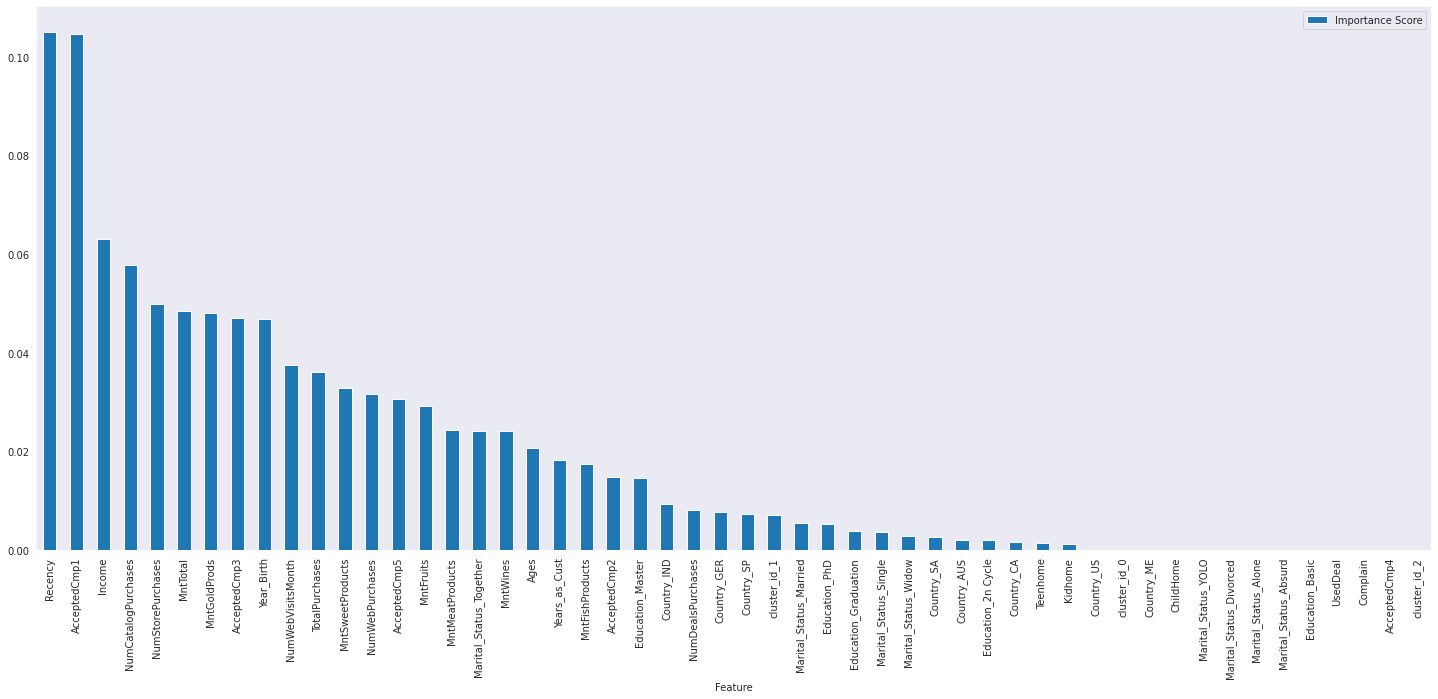

In [59]:
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance Score' : clf.feature_importances_})
importance = importance.sort_values(by=['Importance Score'],ascending=False)

# plot feature importance
ax = importance.plot.bar(x='Feature', y='Importance Score', figsize=(25,10),rot=0)
plt.xticks(rotation=90)

In [60]:
cm = metrics.confusion_matrix(y_test, y_pred_maxtree)
cm

array([[429,  32],
       [ 59,  40]])

Text(0.5, 257.44, 'Predicted label')

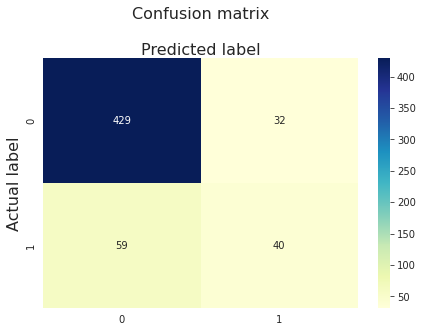

In [61]:
cls_names=[0,1] # name  of classes
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_maxtree))
print("Precision:",metrics.precision_score(y_test, y_pred_maxtree, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred_maxtree, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred_maxtree, average="binary"))

Accuracy: 0.8375
Precision: 0.5555555555555556
Recall: 0.40404040404040403
F1 Score: 0.46783625730994155


In [63]:
!pip install graphviz

In [64]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 3.0 MB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=1501dea72c43b0487d126313ebac19df617004139d0d7c50510be6efe0584f56
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


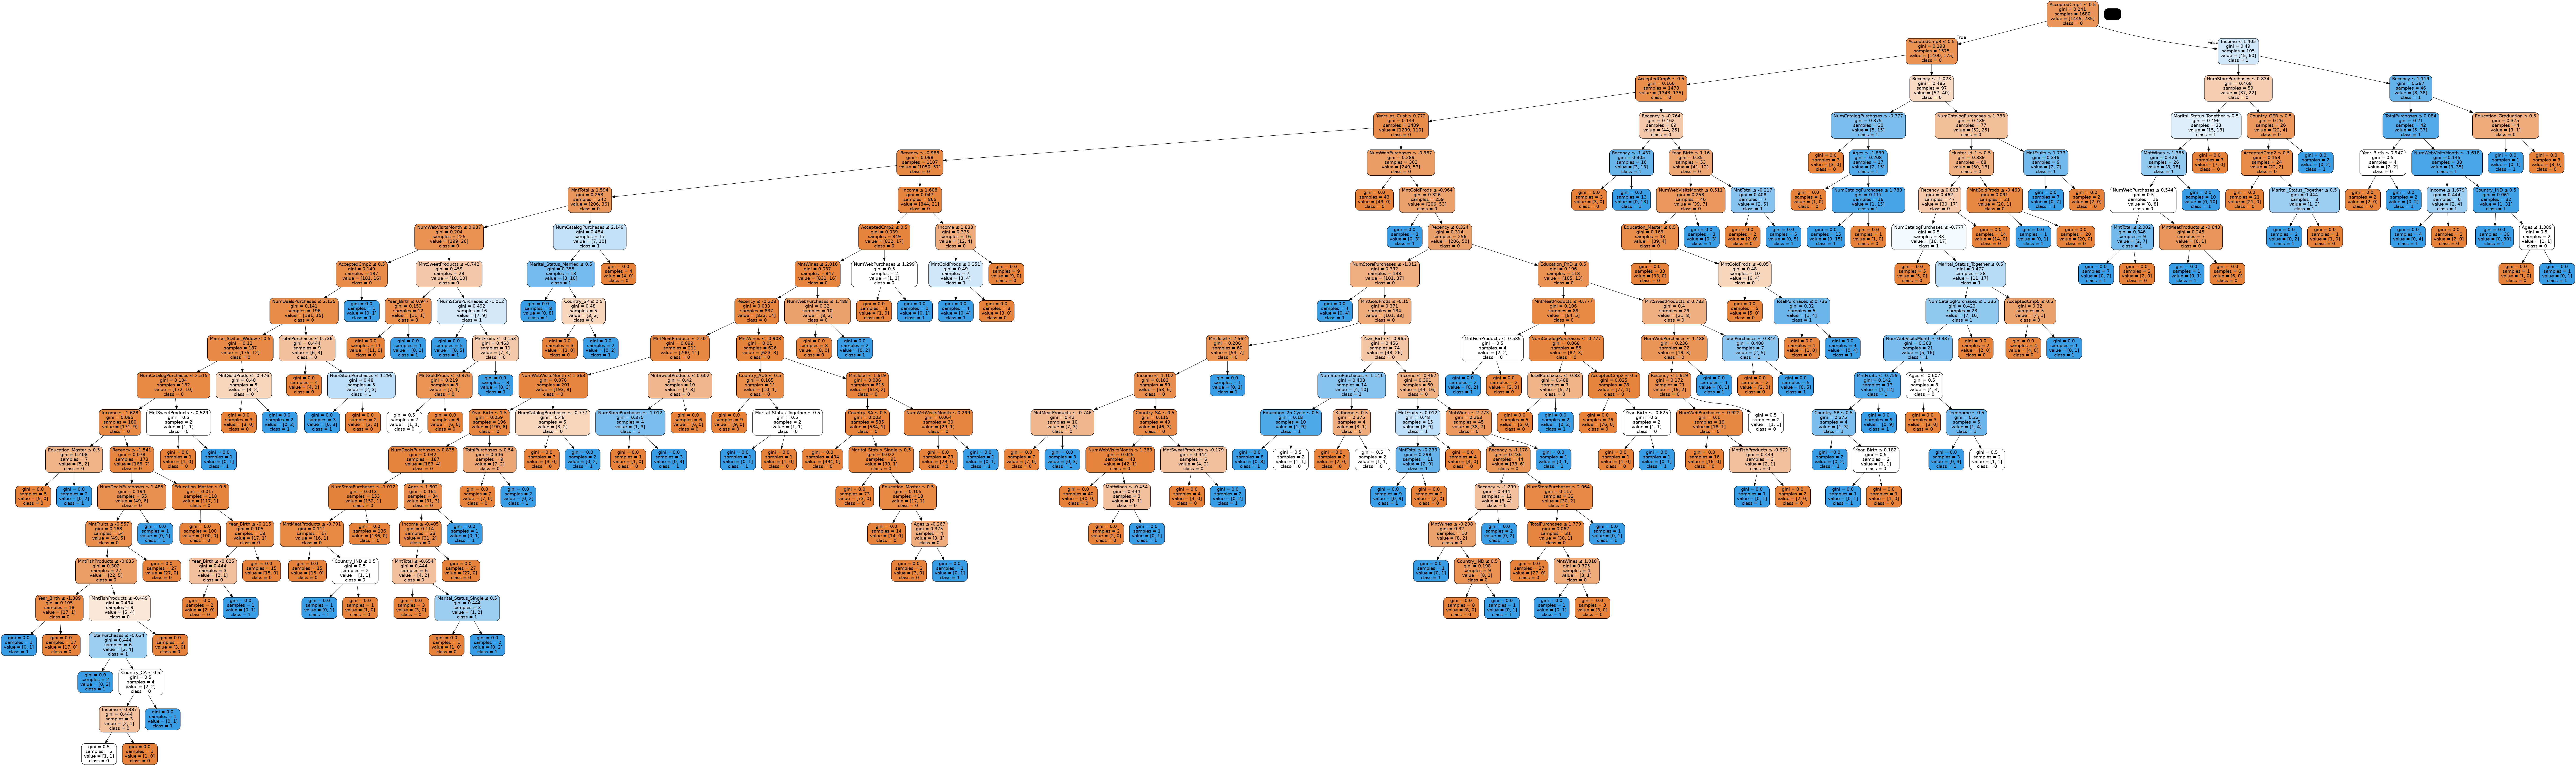

In [65]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_mktdata.png')
Image(graph.create_png())

# ** Tuning to get optimal Tree**

#Code for Tunning the Tree (I put it as a text bx since it would take time to run the GridSearch)
from sklearn.model_selection import GridSearchCV

param_dict = {"criterion": ['gini', 'entropy' ],
              "max_depth": range (1, 20),
              "min_samples_split": range (1, 10),
              "min_samples_leaf": range (1, 5)}

grid = GridSearchCV(clf,
                    param_grid = param_dict,
                    cv=10,
                    verbose=1,
                    n_jobs=-1)
grid.fit(X_train, y_train)

print(str(grid.best_estimator_))
print(grid.best_score_)

#DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2, min_samples_split=6)

In [66]:
# Create Optimal Decision Tree classifer object
clf_op = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=6)

# Train Decision Tree Classifer
clf_op = clf_op.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_optree = clf_op.predict(X_test)

# evaluate model using RMSE
print("Optimal Decision Tree model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_optree)))
print("Median value of target variable: ", y.median())

Optimal Decision Tree model RMSE:  0.3755947664324259
Median value of target variable:  0.0


In [67]:
print("Max depth= " + str(clf_op.get_depth()))
print("Number of Leaves= " + str(clf_op.get_n_leaves()))

Max depth= 4
Number of Leaves= 15


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, 'AcceptedCmp5'),
  Text(1, 0, 'Recency'),
  Text(2, 0, 'AcceptedCmp3'),
  Text(3, 0, 'Years_as_Cust'),
  Text(4, 0, 'NumWebVisitsMonth'),
  Text(5, 0, 'NumCatalogPurchases'),
  Text(6, 0, 'AcceptedCmp1'),
  Text(7, 0, 'MntSweetProducts'),
  Text(8, 0, 'Year_Birth'),
  Text(9, 0, 'Marital_Status_Single'),
  Text(10, 0, 'Marital_Status_Together'),
  Text(11, 0, 'Marital_Status_Married'),
  Text(12, 0, 'Marital_Status_Divorced'),
  Text(13, 0, 'Marital_Status_Alone'),
  Text(14, 0, 'Marital_Status_Absurd'),
  Text(15, 0, 'Education_PhD'),
  Text(16, 0, 'Marital_Status_Widow'),
  Text(17, 0, 'Country_AUS'),
  Text(18, 0, 'Marital_Status_YOLO'),
  Text(19, 0, 'Education_Graduation'),
  Text(20, 0, 'Country_CA'),
  Text(21, 0, 'Country_GER')

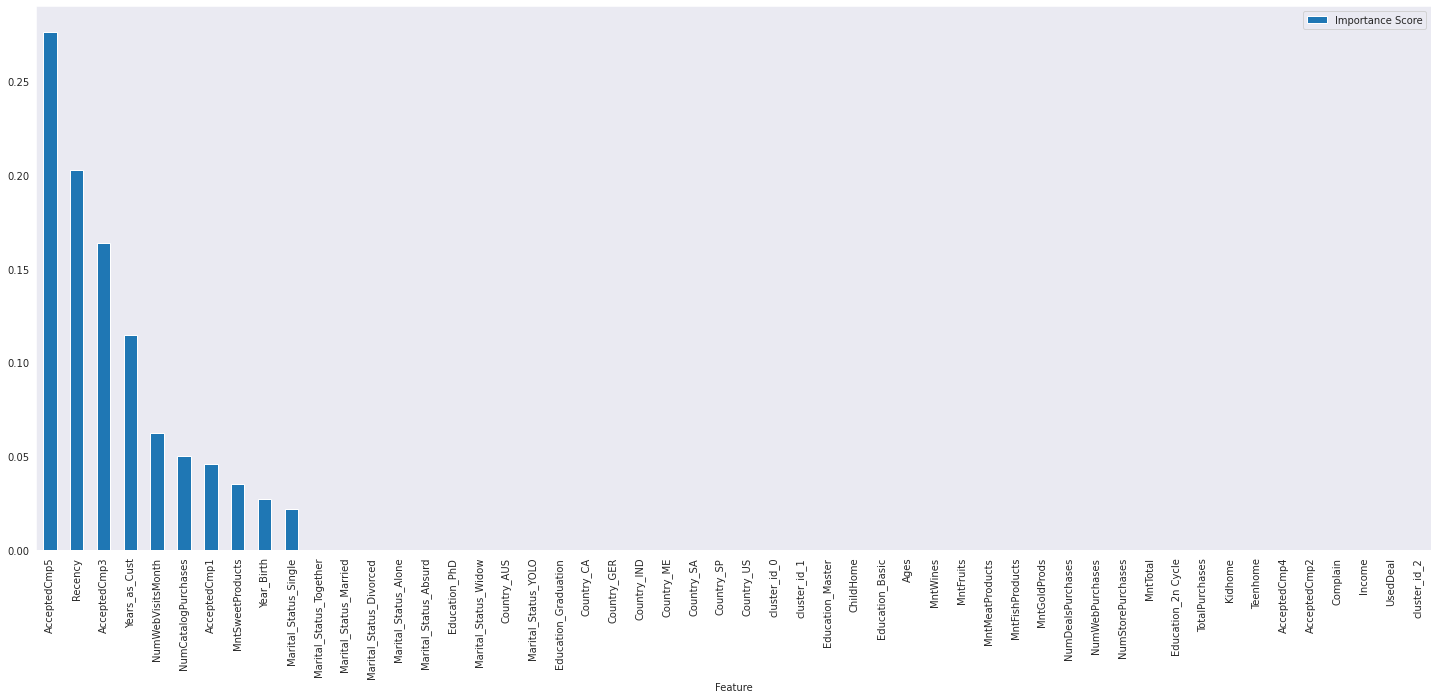

In [68]:
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance Score' : clf_op.feature_importances_})
importance = importance.sort_values(by=['Importance Score'],ascending=False)

# plot feature importance
ax = importance.plot.bar(x='Feature', y='Importance Score', figsize=(25,10),rot=0)
plt.xticks(rotation=90)

Text(0.5, 257.44, 'Predicted label')

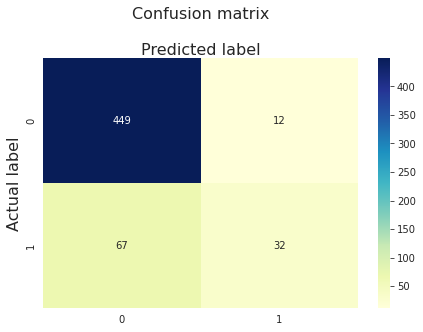

In [69]:
cm = metrics.confusion_matrix(y_test, y_pred_optree)
cls_names=[0,1] # name  of classes
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_optree))
print("Precision:",metrics.precision_score(y_test, y_pred_optree, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred_optree, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred_optree, average="binary"))

Accuracy: 0.8589285714285714
Precision: 0.7272727272727273
Recall: 0.32323232323232326
F1 Score: 0.44755244755244755


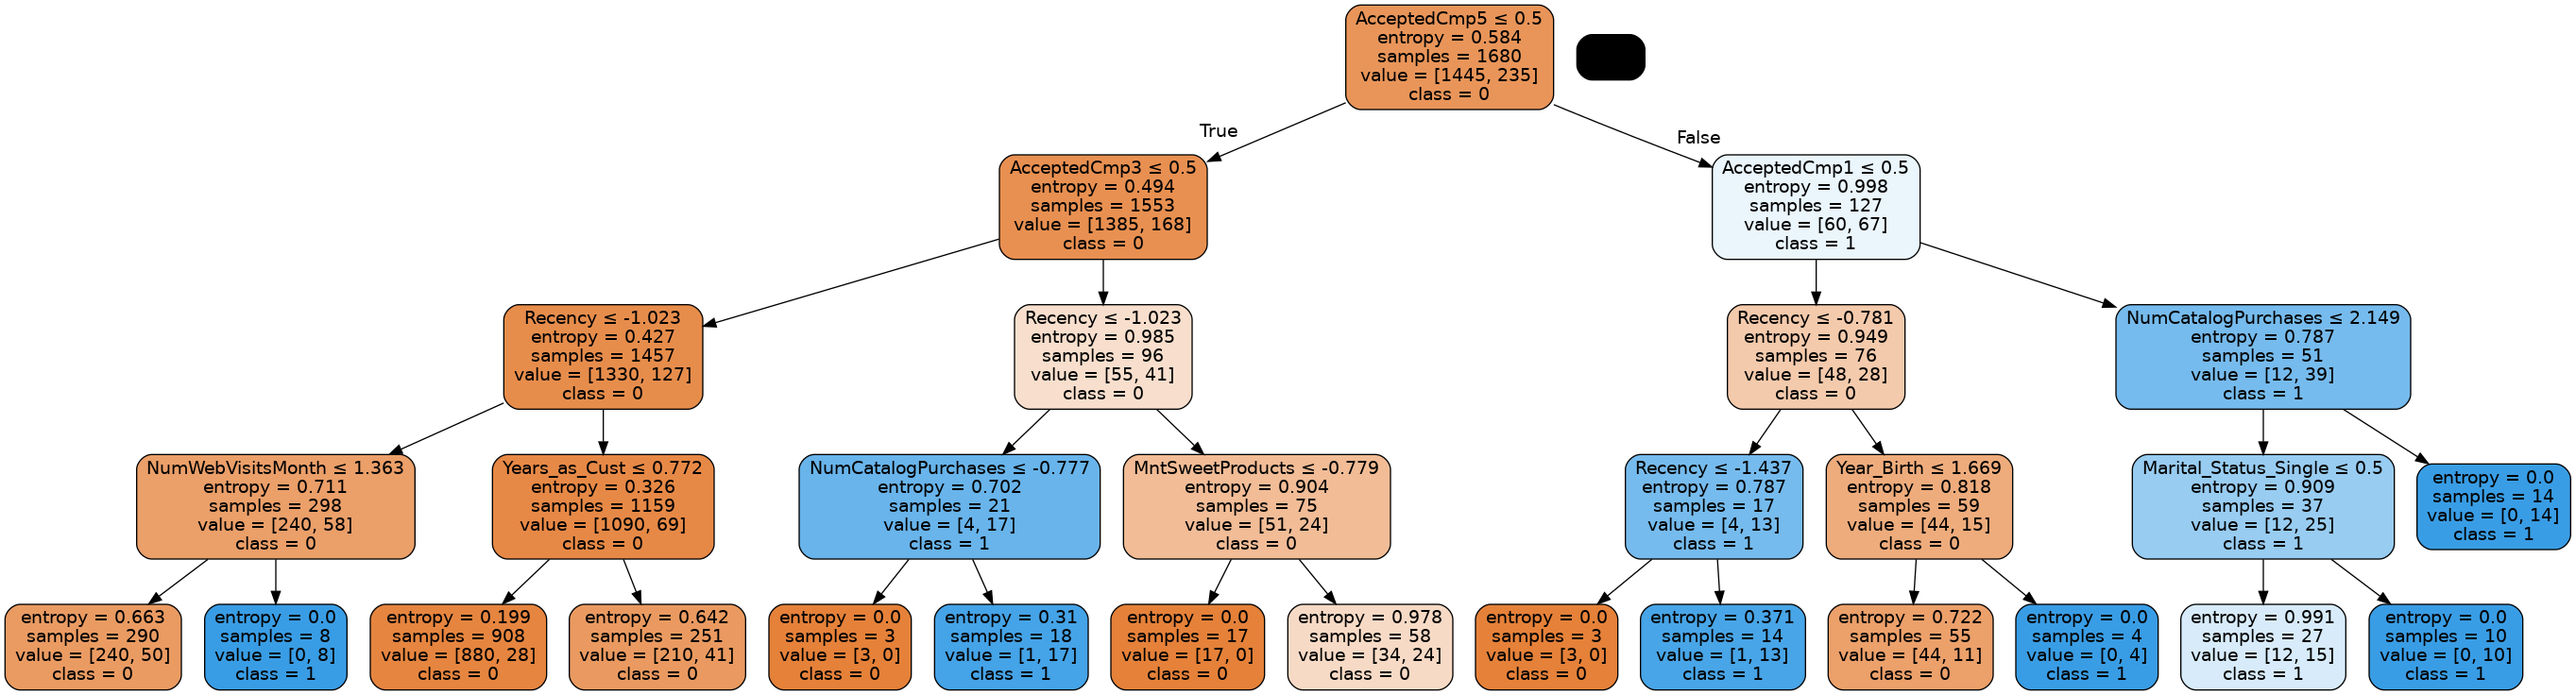

In [71]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_op, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_mktdata_op.png')
Image(graph.create_png())

# **Gradient Boosting Classifier**

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_GBC = GradientBoostingClassifier(random_state = 3)
classifier_GBC.fit(X_train, y_train)

y_pred_GBC = classifier_GBC.predict(X_test)

# evaluate model using RMSE
print("Gradient Booster Classifier model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_GBC)))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_GBC))
print("Precision:",metrics
      .precision_score(y_test, y_pred_GBC, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred_GBC, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred_GBC, average="binary"))

Gradient Booster Classifier model RMSE:  0.3635145899999849
Accuracy: 0.8678571428571429
Precision: 0.7906976744186046
Recall: 0.3434343434343434
F1 Score: 0.47887323943661964


**Tunning model**

#Code for Tunning Model
from sklearn.model_selection import RandomizedSearchCV

grid = {
    'learning_rate' : [0.2, 0.3, 0.4, 0.5],
    'n_estimators' : [300, 500, 700, 900],
    'min_samples_split' : [3, 4, 5, 6],
    'max_depth' : [2, 3, 4, 5],
    'loss' : ['deviance', 'exponential']
}
random_cv = RandomizedSearchCV(estimator=classifier_GBC,
                              param_distributions=grid,
                              n_iter=20,
                              n_jobs=-1,
                              cv=5,
                              verbose=7,
                              random_state=10,
                              scoring='accuracy')
random_cv.fit(X_train, y_train)

random_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.2, loss='exponential', max_depth=4,
                           min_samples_split=4, n_estimators=300,
                           random_state=3)

In [73]:
hgb = GradientBoostingClassifier(learning_rate=0.2, loss='exponential', max_depth=4,
                           min_samples_split=4, n_estimators=300,
                           random_state=3)
hgb.fit(X_train, y_train)
y_pred_hgb = hgb.predict(X_test)

# evaluate model using RMSE
print("Gradient Booster Classifier model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_hgb)))
print("Median value of target variable: ", y.median())

Gradient Booster Classifier model RMSE:  0.37080992435478316
Median value of target variable:  0.0


In [74]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_hgb))

Accuracy: 0.8625


In [75]:
cm = metrics.confusion_matrix(y_test, y_pred_hgb)
cm

array([[447,  14],
       [ 63,  36]])

Text(0.5, 257.44, 'Predicted label')

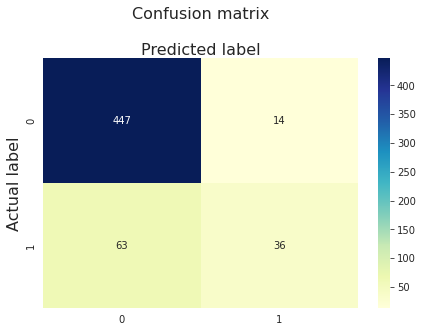

In [76]:
cls_names=[0,1] # name  of classes
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_hgb))
print("Precision:",metrics.precision_score(y_test, y_pred_hgb, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred_hgb, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred_hgb, average="binary"))

Accuracy: 0.8625
Precision: 0.72
Recall: 0.36363636363636365
F1 Score: 0.4832214765100672


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, 'Recency'),
  Text(1, 0, 'AcceptedCmp1'),
  Text(2, 0, 'Income'),
  Text(3, 0, 'AcceptedCmp5'),
  Text(4, 0, 'AcceptedCmp3'),
  Text(5, 0, 'NumWebVisitsMonth'),
  Text(6, 0, 'NumStorePurchases'),
  Text(7, 0, 'NumCatalogPurchases'),
  Text(8, 0, 'MntWines'),
  Text(9, 0, 'MntMeatProducts'),
  Text(10, 0, 'Years_as_Cust'),
  Text(11, 0, 'MntTotal'),
  Text(12, 0, 'TotalPurchases'),
  Text(13, 0, 'MntGoldProds'),
  Text(14, 0, 'MntSweetProducts'),
  Text(15, 0, 'MntFruits'),
  Text(16, 0, 'Ages'),
  Text(17, 0, 'AcceptedCmp2'),
  Text(18, 0, 'Year_Birth'),
  Text(19, 0, 'NumWebPurchases'),
  Text(20, 0, 'NumDealsPurchases'),
  Text(21, 0, 'Kidhome'),
  Text(22, 0, 'ChildHome'),
  Text(23, 0, 'Marital_Status_Together'),
  Text(24, 0, 'Mnt

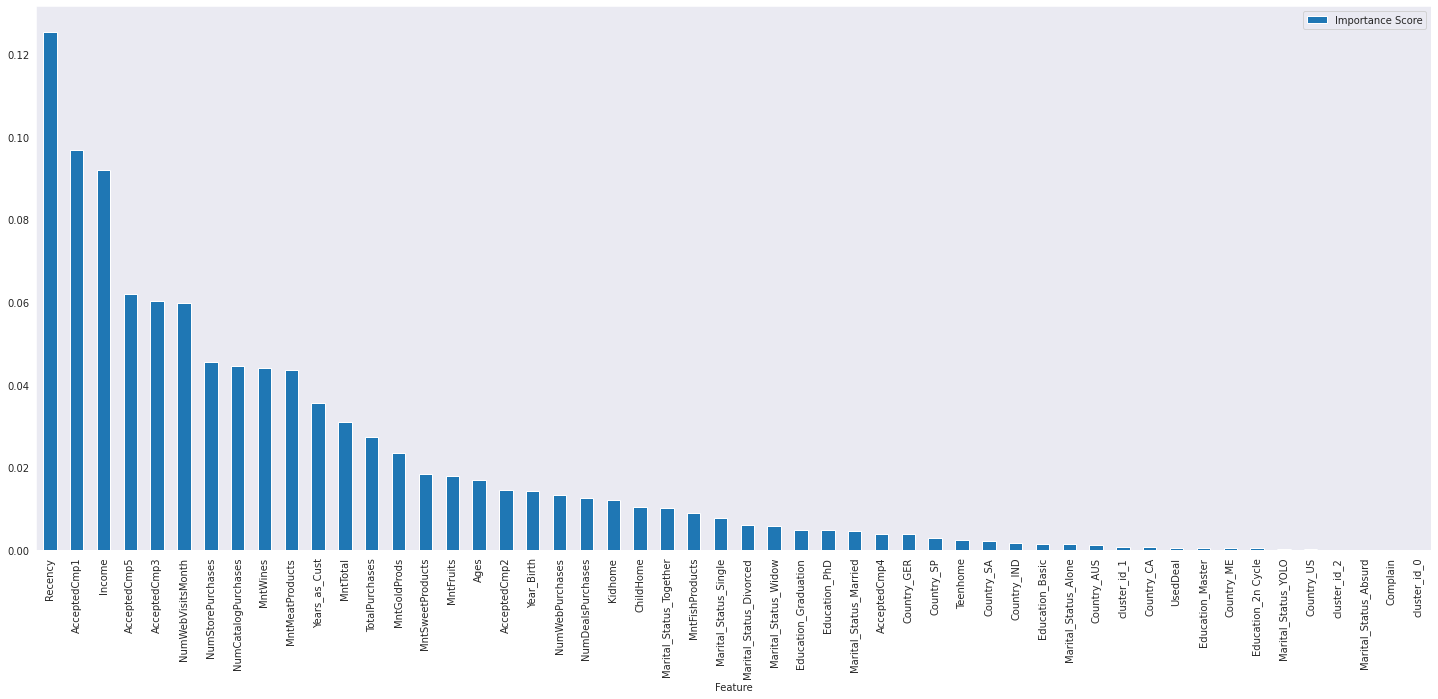

In [78]:
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance Score' : hgb.feature_importances_})
importance = importance.sort_values(by=['Importance Score'],ascending=False)

# plot feature importance
ax = importance.plot.bar(x='Feature', y='Importance Score', figsize=(25,10),rot=0)
plt.xticks(rotation=90)

# **Neural Network**

In [79]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
# set Hyper parameters
learning_rate=0.01
no_epochs=100


In [80]:
# Model creation

model = Sequential([
    Flatten(input_shape=(52,)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [81]:
#Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [82]:
# Fit model
model.fit(X_train, y_train, epochs=no_epochs, batch_size=len(mktdata_trf),  verbose=2)


2022-01-13 13:41:06.589200: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
1/1 - 1s - loss: 0.8202 - accuracy: 0.2381
Epoch 2/100
1/1 - 0s - loss: 0.8083 - accuracy: 0.2524
Epoch 3/100
1/1 - 0s - loss: 0.7967 - accuracy: 0.2768
Epoch 4/100
1/1 - 0s - loss: 0.7856 - accuracy: 0.2952
Epoch 5/100
1/1 - 0s - loss: 0.7748 - accuracy: 0.3190
Epoch 6/100
1/1 - 0s - loss: 0.7643 - accuracy: 0.3405
Epoch 7/100
1/1 - 0s - loss: 0.7541 - accuracy: 0.3625
Epoch 8/100
1/1 - 0s - loss: 0.7443 - accuracy: 0.3863
Epoch 9/100
1/1 - 0s - loss: 0.7348 - accuracy: 0.4131
Epoch 10/100
1/1 - 0s - loss: 0.7256 - accuracy: 0.4423
Epoch 11/100
1/1 - 0s - loss: 0.7167 - accuracy: 0.4744
Epoch 12/100
1/1 - 0s - loss: 0.7080 - accuracy: 0.4964
Epoch 13/100
1/1 - 0s - loss: 0.6997 - accuracy: 0.5214
Epoch 14/100
1/1 - 0s - loss: 0.6916 - accuracy: 0.5512
Epoch 15/100
1/1 - 0s - loss: 0.6836 - accuracy: 0.5786
Epoch 16/100
1/1 - 0s - loss: 0.6758 - accuracy: 0.5958
Epoch 17/100
1/1 - 0s - loss: 0.6682 - accuracy: 0.6179
Epoch 18/100
1/1 - 0s - loss: 0.6607 - accuracy: 0.6363
E

In [83]:
y_pred_NN = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


18/18 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8232
Test accuracy: 0.8232142925262451


## FInding the significant variables to include in the best model so far the logistic Regression model

In [84]:
from sklearn.feature_selection import RFE

In [85]:
rfe = RFE(lored,n_features_to_select=40)
rfe = rfe.fit(X_train, y_train.values)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False  True False False False  True  True  True
 False  True False False  True  True  True  True  True  True  True  True
  True  True  True False  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True False]
[ 7  1  1  1  5  1  4 10  3  1  1  1  2  1 12  8  1  1  1  1  1  1  1  1
  1  1  1  6  1  1 11  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 13  1  9]


In [86]:
X_train_sig = X_train.loc[:, [False, True, True, True, False, True, False, False, True, True, True, True
                              , True, True, False, False, True, True, True, True, True, True, True, True
                              , True, True, True, True, True, True, True, True, True, True, True, False
                              , True, True, True, False, False, True, True, True, True, True, True, False
                              , True, True, False, False]
                          ]
X_test_sig = X_test.loc[:, [False, True, True, True, False, True, False, False, True, True, True, True
                              , True, True, False, False, True, True, True, True, True, True, True, True
                              , True, True, True, True, True, True, True, True, True, True, True, False
                              , True, True, True, False, False, True, True, True, True, True, True, False
                              , True, True, False, False]
                        ]

In [87]:
X_train_sig

Income   Recency  MntWines  MntMeatProducts  MntGoldProds  \
104  -0.164054 -1.592395  0.060085        -0.564241      0.062935   
2039 -0.615241  1.412165 -0.417281        -0.267782      0.062935   
1942 -0.769220  1.274024 -0.846305        -0.676113     -0.613442   
1241 -0.768026  0.168899 -0.876518        -0.732048     -0.914053   
1723 -1.349639  0.928672 -0.900688        -0.782390     -0.187575   
...        ...       ...       ...              ...           ...   
960   0.909022 -0.245523  1.407584         2.266105     -0.638493   
905   0.530596 -0.349129  0.032893        -0.581022      2.179743   
1096 -0.023141 -0.003777 -0.897667        -0.793578     -0.889002   
235  -1.195134 -1.350649 -0.819113        -0.771203     -0.763747   
1061 -1.396554 -0.072848 -0.906731        -0.782390      0.163139   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
104            1.810001         1.110530            -0.594004   
2039           2.460058         0.354884            -0.594004   
1942          -0.140168        -0.778585            -0.959746   
1241          -0.140168        -0.778585            -0.959746   
1723          -0.140168        -0.400762            -0.959746   
...                 ...              ...                  ...   
960           -0.790225         0.732707             1.234706   
905           -0.140168         1.110530             0.503222   
1096          -0.790225        -1.156408            -0.959746   
235            1.159945        -0.778585            -0.594004   
1061          -0.790225        -0.778585            -0.594004   

      NumStorePurchases  NumWebVisitsMonth  ...  Marital_Status_Single  \
104            0.064556           1.150377  ...                      0   
2039           0.064556           1.150377  ...                      0   
1942          -0.550785           0.298528  ...                      0   
1241          -0.858455           0.724452  ...                      1   
1723          -0.858455           1.150377  ...                      1   
...                 ...                ...  ...                    ...   
960            1.295237          -0.979246  ...                      1   
905           -0.858455           0.298528  ...                      0   
1096          -1.166125           0.724452  ...                      1   
235           -0.550785          -0.553322  ...                      0   
1061          -1.166125           1.150377  ...                      0   

      Marital_Status_Together  Country_AUS  Country_CA  Country_GER  \
104                         0            0           0            0   
2039                        0            0           0            0   
1942                        0            0           1            0   
1241                        0            1           0            0   
1723                        0            0           0            0   
...                       ...          ...         ...          ...   
960                         0            0           0            0   
905                         0            0           0            0   
1096                        0            1           0            0   
235                         1            0           0            0   
1061                        1            1           0            0   

      Country_IND  Country_ME  Country_SA  Country_US  cluster_id_0  
104             1           0           0           0             0  
2039            0           0           0           0             0  
1942            0           0           0           0             0  
1241            0           0           0           0             0  
1723            0           0           0           0             0  
...           ...         ...         ...         ...           ...  
960             0           0           0           0             1  
905             0           0           0           0             0  
1096            0         

In [88]:
# Logistic regression model
lored = LogisticRegression(C=1e9, solver='liblinear')
lored.fit(X_train_sig, y_train)

# predictions
y_pred = lored.predict(X_test_sig)

# evaluate model using RMSE
print("Logistic regression model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Median value of target variable: ", y.median())

Logistic regression model RMSE:  0.36596252735569995
Median value of target variable:  0.0


In [89]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average="binary"))

Accuracy: 0.8660714285714286
Precision: 0.7
Recall: 0.42424242424242425
F1 Score: 0.5283018867924527


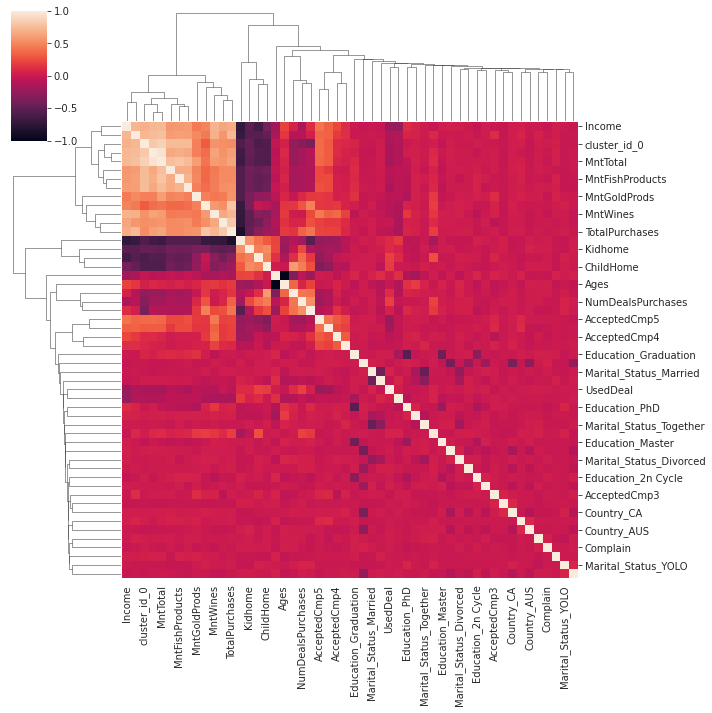

In [90]:
sns.clustermap(X_train.corr())

In [91]:
import statsmodels.api as sm
log_reg = sm.GLM(y_train, X_train).fit()
print(log_reg.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                 1680
Model:                            GLM   Df Residuals:                     1632
Model Family:                Gaussian   Df Model:                           47
Link Function:               identity   Scale:                        0.082113
Method:                          IRLS   Log-Likelihood:                -236.49
Date:                Thu, 13 Jan 2022   Deviance:                       130.35
Time:                        13:41:18   Pearson chi2:                     130.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Year_Birth                

# Try logit model

In [92]:
rfe = RFE(lored,n_features_to_select=25)
rfe = rfe.fit(X_train, y_train.values)
print(rfe.support_)
print(rfe.ranking_)


[False False  True False False  True False False False  True  True  True
 False False False False  True  True  True  True  True  True  True  True
  True  True  True False False  True False False  True  True  True False
  True False  True False False False False  True  True  True False False
 False False False False]
[22 15  1 11 20  1 19 25 18  1  1  1 17  2 27 23  1  1  1  1  1  1  1  1
  1  1  1 21 14  1 26 10  1  1  1  7  1  6  1  8  9 13  5  1  1  1  4 16
  3 28 12 24]


In [93]:
X_train_sig = X_train.loc[:, [False, False, True, False, False, True , False, False, False, True, True, True
                              , False, True, False, False, True, True, True, True, True, True, True, True
                              , True, False, True, False, False, True, False, True, True, False, True , False
                              , True, False, True, False, False, False, False, False, True, False, False, True 
                              , False, True, False, False]]

X_test_sig = X_test.loc[:, [False, False, True, False, False, True , False, False, False, True, True, True
                              , False, True, False, False, True, True, True, True, True, True, True, True
                              , True, False, True, False, False, True, False, True, True, False, True , False
                              , True, False, True, False, False, False, False, False, True, False, False, True 
                              , False, True, False, False]]

In [94]:
log_reg = sm.Logit(y_train, X_train_sig).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.248029
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1680
Model:                          Logit   Df Residuals:                     1655
Method:                           MLE   Df Model:                           24
Date:                Thu, 13 Jan 2022   Pseudo R-squ.:                  0.3872
Time:                        13:41:21   Log-Likelihood:                -416.69
converged:                       True   LL-Null:                       -679.98
Covariance Type:            nonrobust   LLR p-value:                 4.991e-96
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Recency                    -0.8857      0.100     -8.875      0.000      -1.081   

In [95]:
y_pred_24logit = log_reg.predict(X_test_sig)


In [96]:
# change the y_pred from probability to decrete value 0 and 1
for idx in y_pred_24logit.index :
  if y_pred_24logit[idx] < 0.5:
    y_pred_24logit[idx] = 0
  else:
    y_pred_24logit[idx] = 1

In [97]:
print("Logistic regression with 24 features model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_24logit)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_24logit))
print("Precision:",metrics.precision_score(y_test, y_pred_24logit, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred_24logit, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred_24logit, average="binary"))

Logistic regression with 24 features model RMSE:  0.35606981658898623
Accuracy: 0.8732142857142857
Precision: 0.7413793103448276
Recall: 0.43434343434343436
F1 Score: 0.5477707006369427


# Analyze with labels of groups

In [98]:
# Create dataframe mktdata_trf_sig to predict target with 24 features
mktdata_trf_sig =mktdata_trf.drop(['Response'], axis=1).loc[:, [False, False, True, False, False, True , False, False, False, True, True, True
                              , False, True, False, False, True, True, True, True, True, True, True, True
                              , True, False, True, False, False, True, False, True, True, False, True , False
                              , True, False, True, False, False, False, False, False, True, False, False, True 
                              , False, True, False, False]]


In [99]:
y_pred_sig = log_reg.predict(mktdata_trf_sig)

# change the y_pred from probability to decrete value 0 and 1
for idx in y_pred_sig.index :
  if y_pred_sig[idx] < 0.5:
    y_pred_sig[idx] = 0
  else:
    y_pred_sig[idx] = 1


mktdata_E['Response_pred'] = y_pred_sig


cluster_cat           H&H         M&M         L&L
Response_pred                                    
0.0            519.000000  524.000000  962.000000
1.0            133.000000   58.000000   44.000000
%Repsonse       20.398773    9.965636    4.373757


<AxesSubplot:xlabel='Response_pred'>

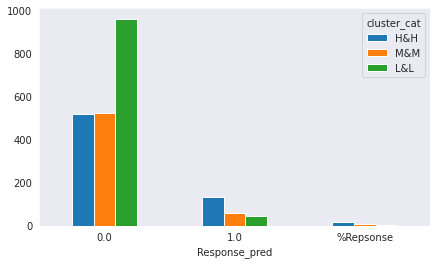

In [100]:
CrosstabResult = pd.crosstab(index=mktdata_E['Response_pred'],columns=mktdata_E['cluster_cat'])
CrosstabResult.loc['%Repsonse'] = (CrosstabResult.loc[1]/ (CrosstabResult.loc[1]+CrosstabResult.loc[0]))*100
print(CrosstabResult)


CrosstabResult.plot.bar(figsize=(7,4), rot=0)

So the H&H group is likely to response to our campaign and the L&L is the least likely to repsonse

In [101]:
# Create data frame for H&H group who likely to response "Yes" to our next campaign
mktdata_H = mktdata_E.loc[mktdata_E['cluster_id'] == 0]
mktdata_H = mktdata_H.loc[mktdata_H['Response_pred'] == 1]

# Create data frame for M&M group who likely to response "No" to our next campaign
mktdata_L = mktdata_E.loc[mktdata['cluster_id'] == 2]
mktdata_L = mktdata_L.loc[mktdata_L['Response_pred'] == 0]

# Create data frame for M&M group who likely to response "No" to our next campaign
mktdata_M = mktdata_E.loc[mktdata['cluster_id'] == 1]
mktdata_M = mktdata_M.loc[mktdata_M['Response_pred'] == 0]


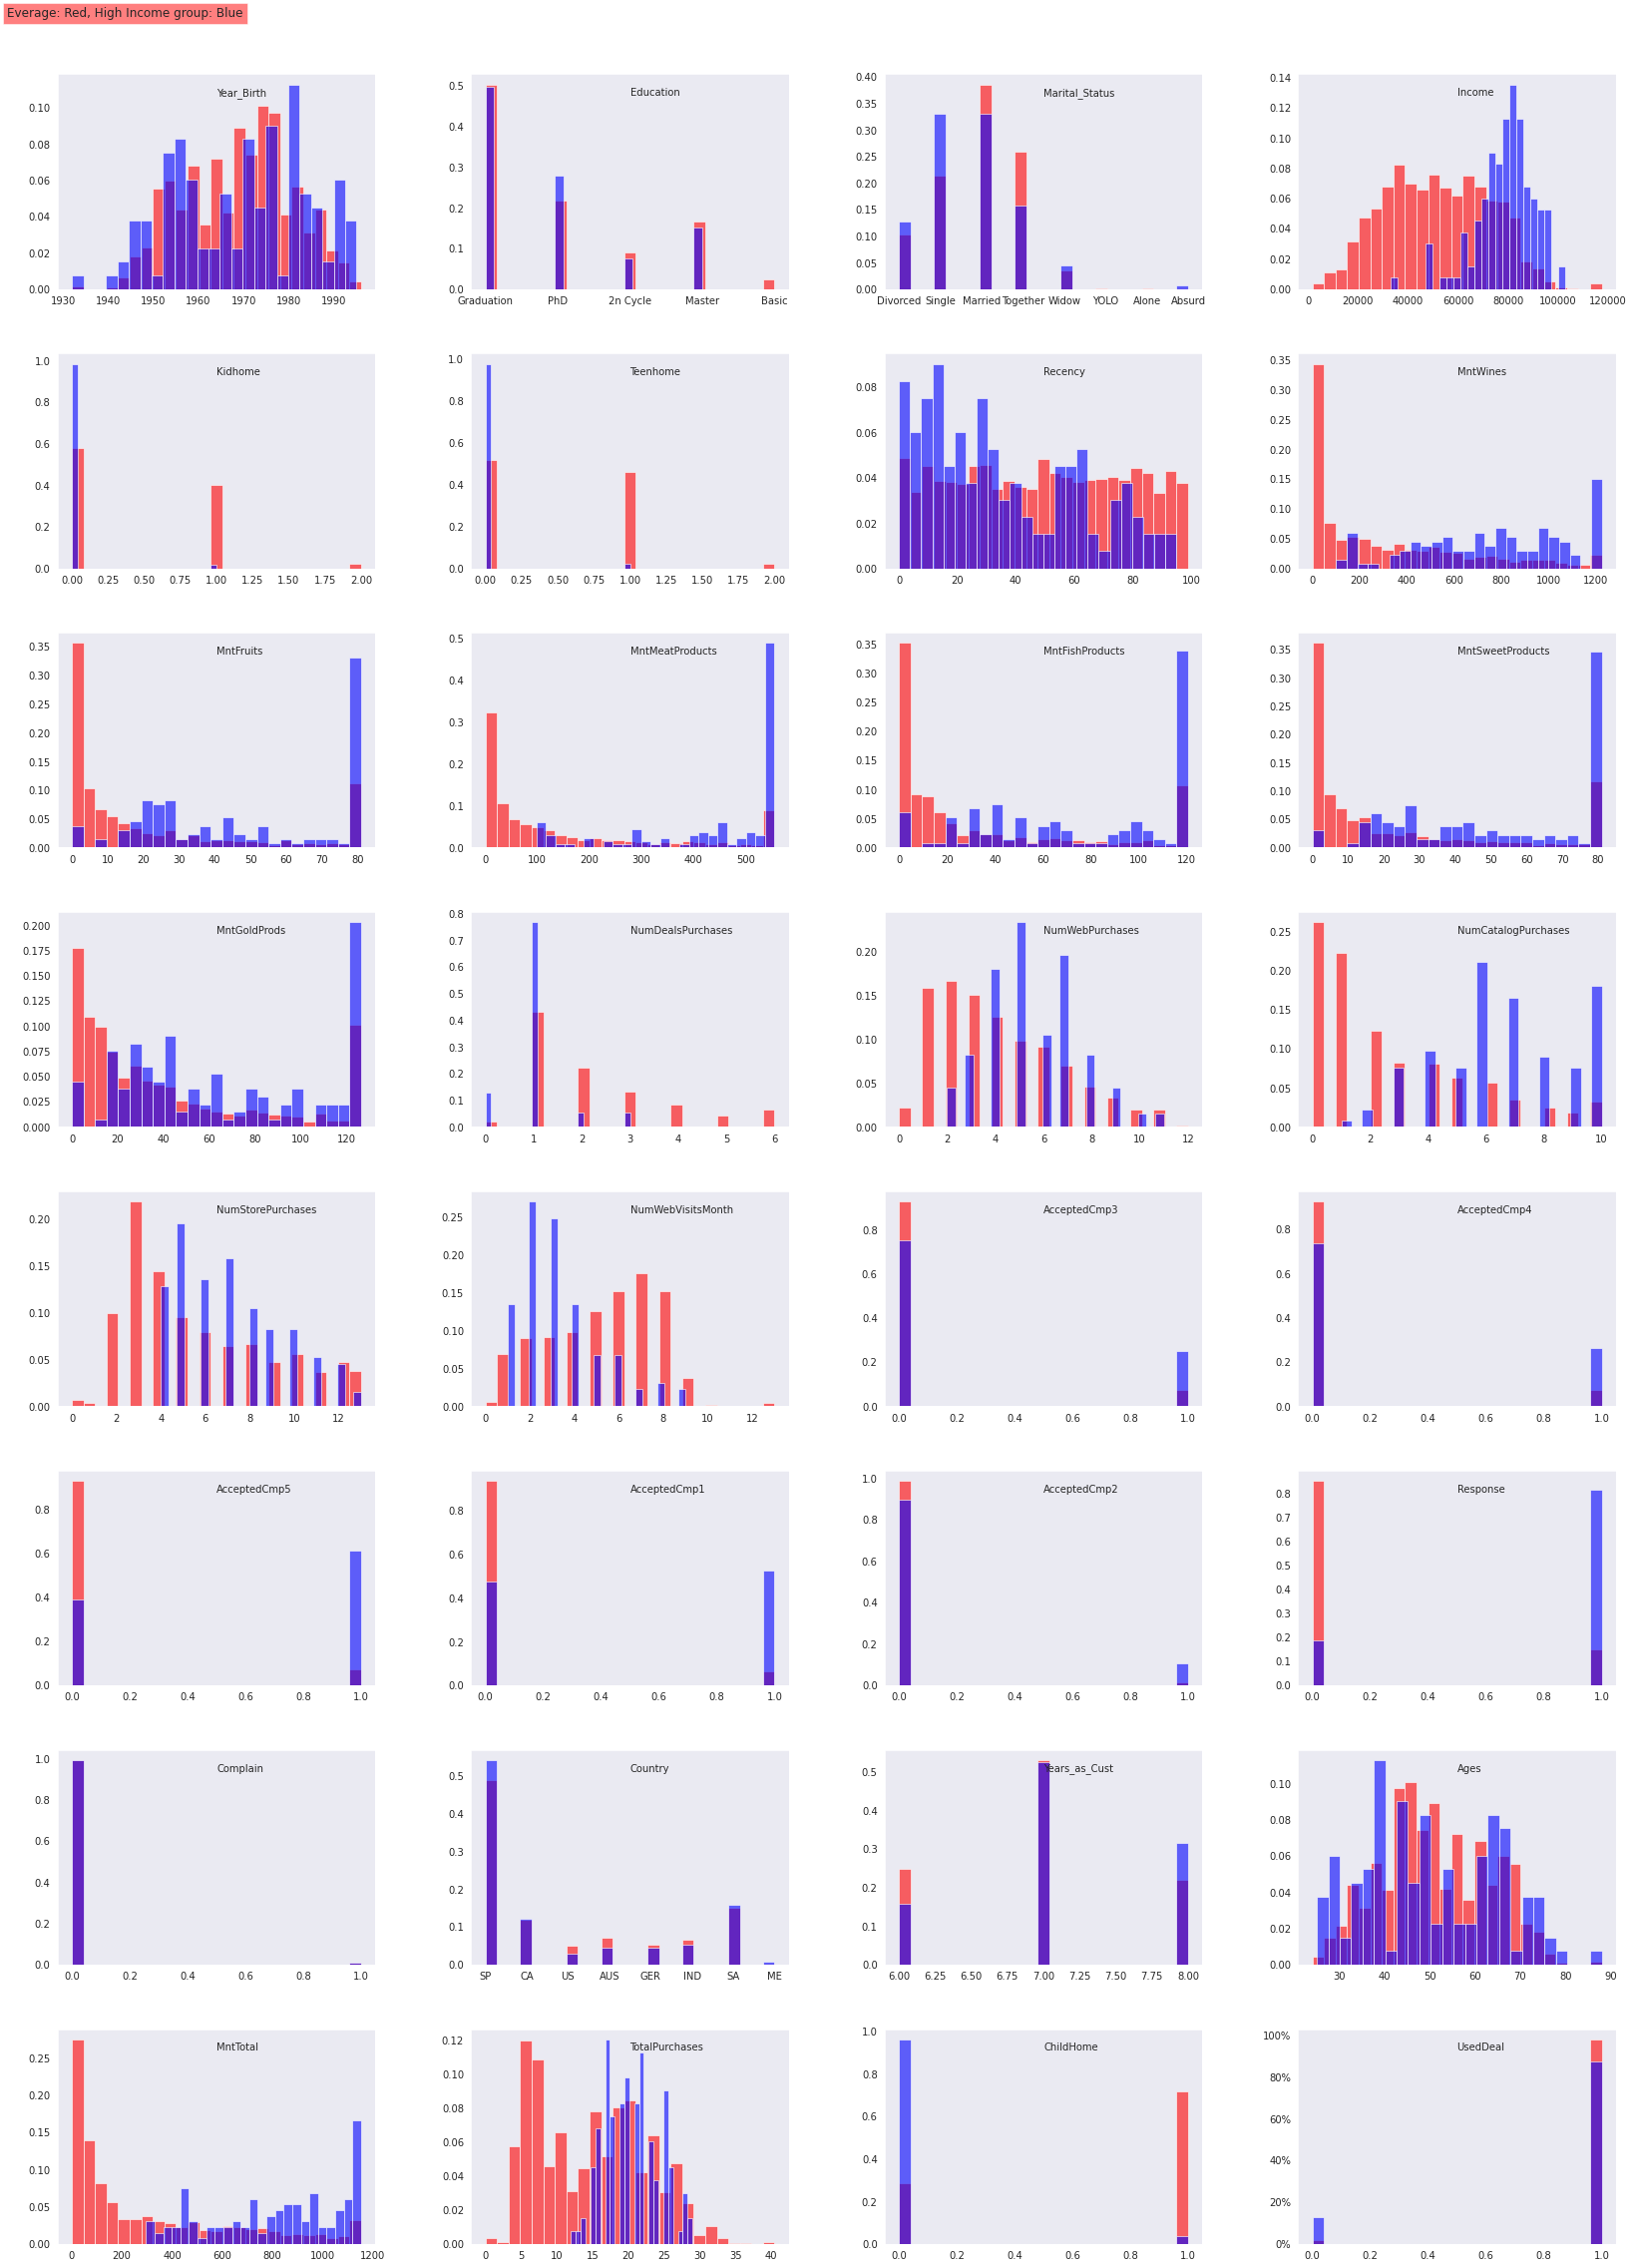

In [102]:
plt_a = mktdata.drop(['ID', 'Dt_Customer'], axis=1)
plt_b = mktdata_H.drop(['ID', 'Dt_Customer'], axis=1)


from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(8,4, figsize=(28, 40))
fig.subplots_adjust(hspace = .3, wspace=.3)

count = 0

for count, item in enumerate(axs.reshape(-1)):
  item.hist(plt_a.iloc[:,count], color = 'red',weights=np.ones(len(plt_a.iloc[:,count])) / len(plt_a.iloc[:,count]), alpha=0.6, bins=25, label=plt_a.columns[count])
  item.hist(plt_b.iloc[:,count], color = 'blue',weights=np.ones(len(plt_b.iloc[:,count])) / len(plt_b.iloc[:,count]), alpha=0.6, bins=25, label=plt_b.columns[count])
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  #Title 
  item.text(0.5,0.9,plt_a.columns[count],transform=item.transAxes)

fig.text(0.1,0.9, 'Everage: Red, High Income group: Blue',fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

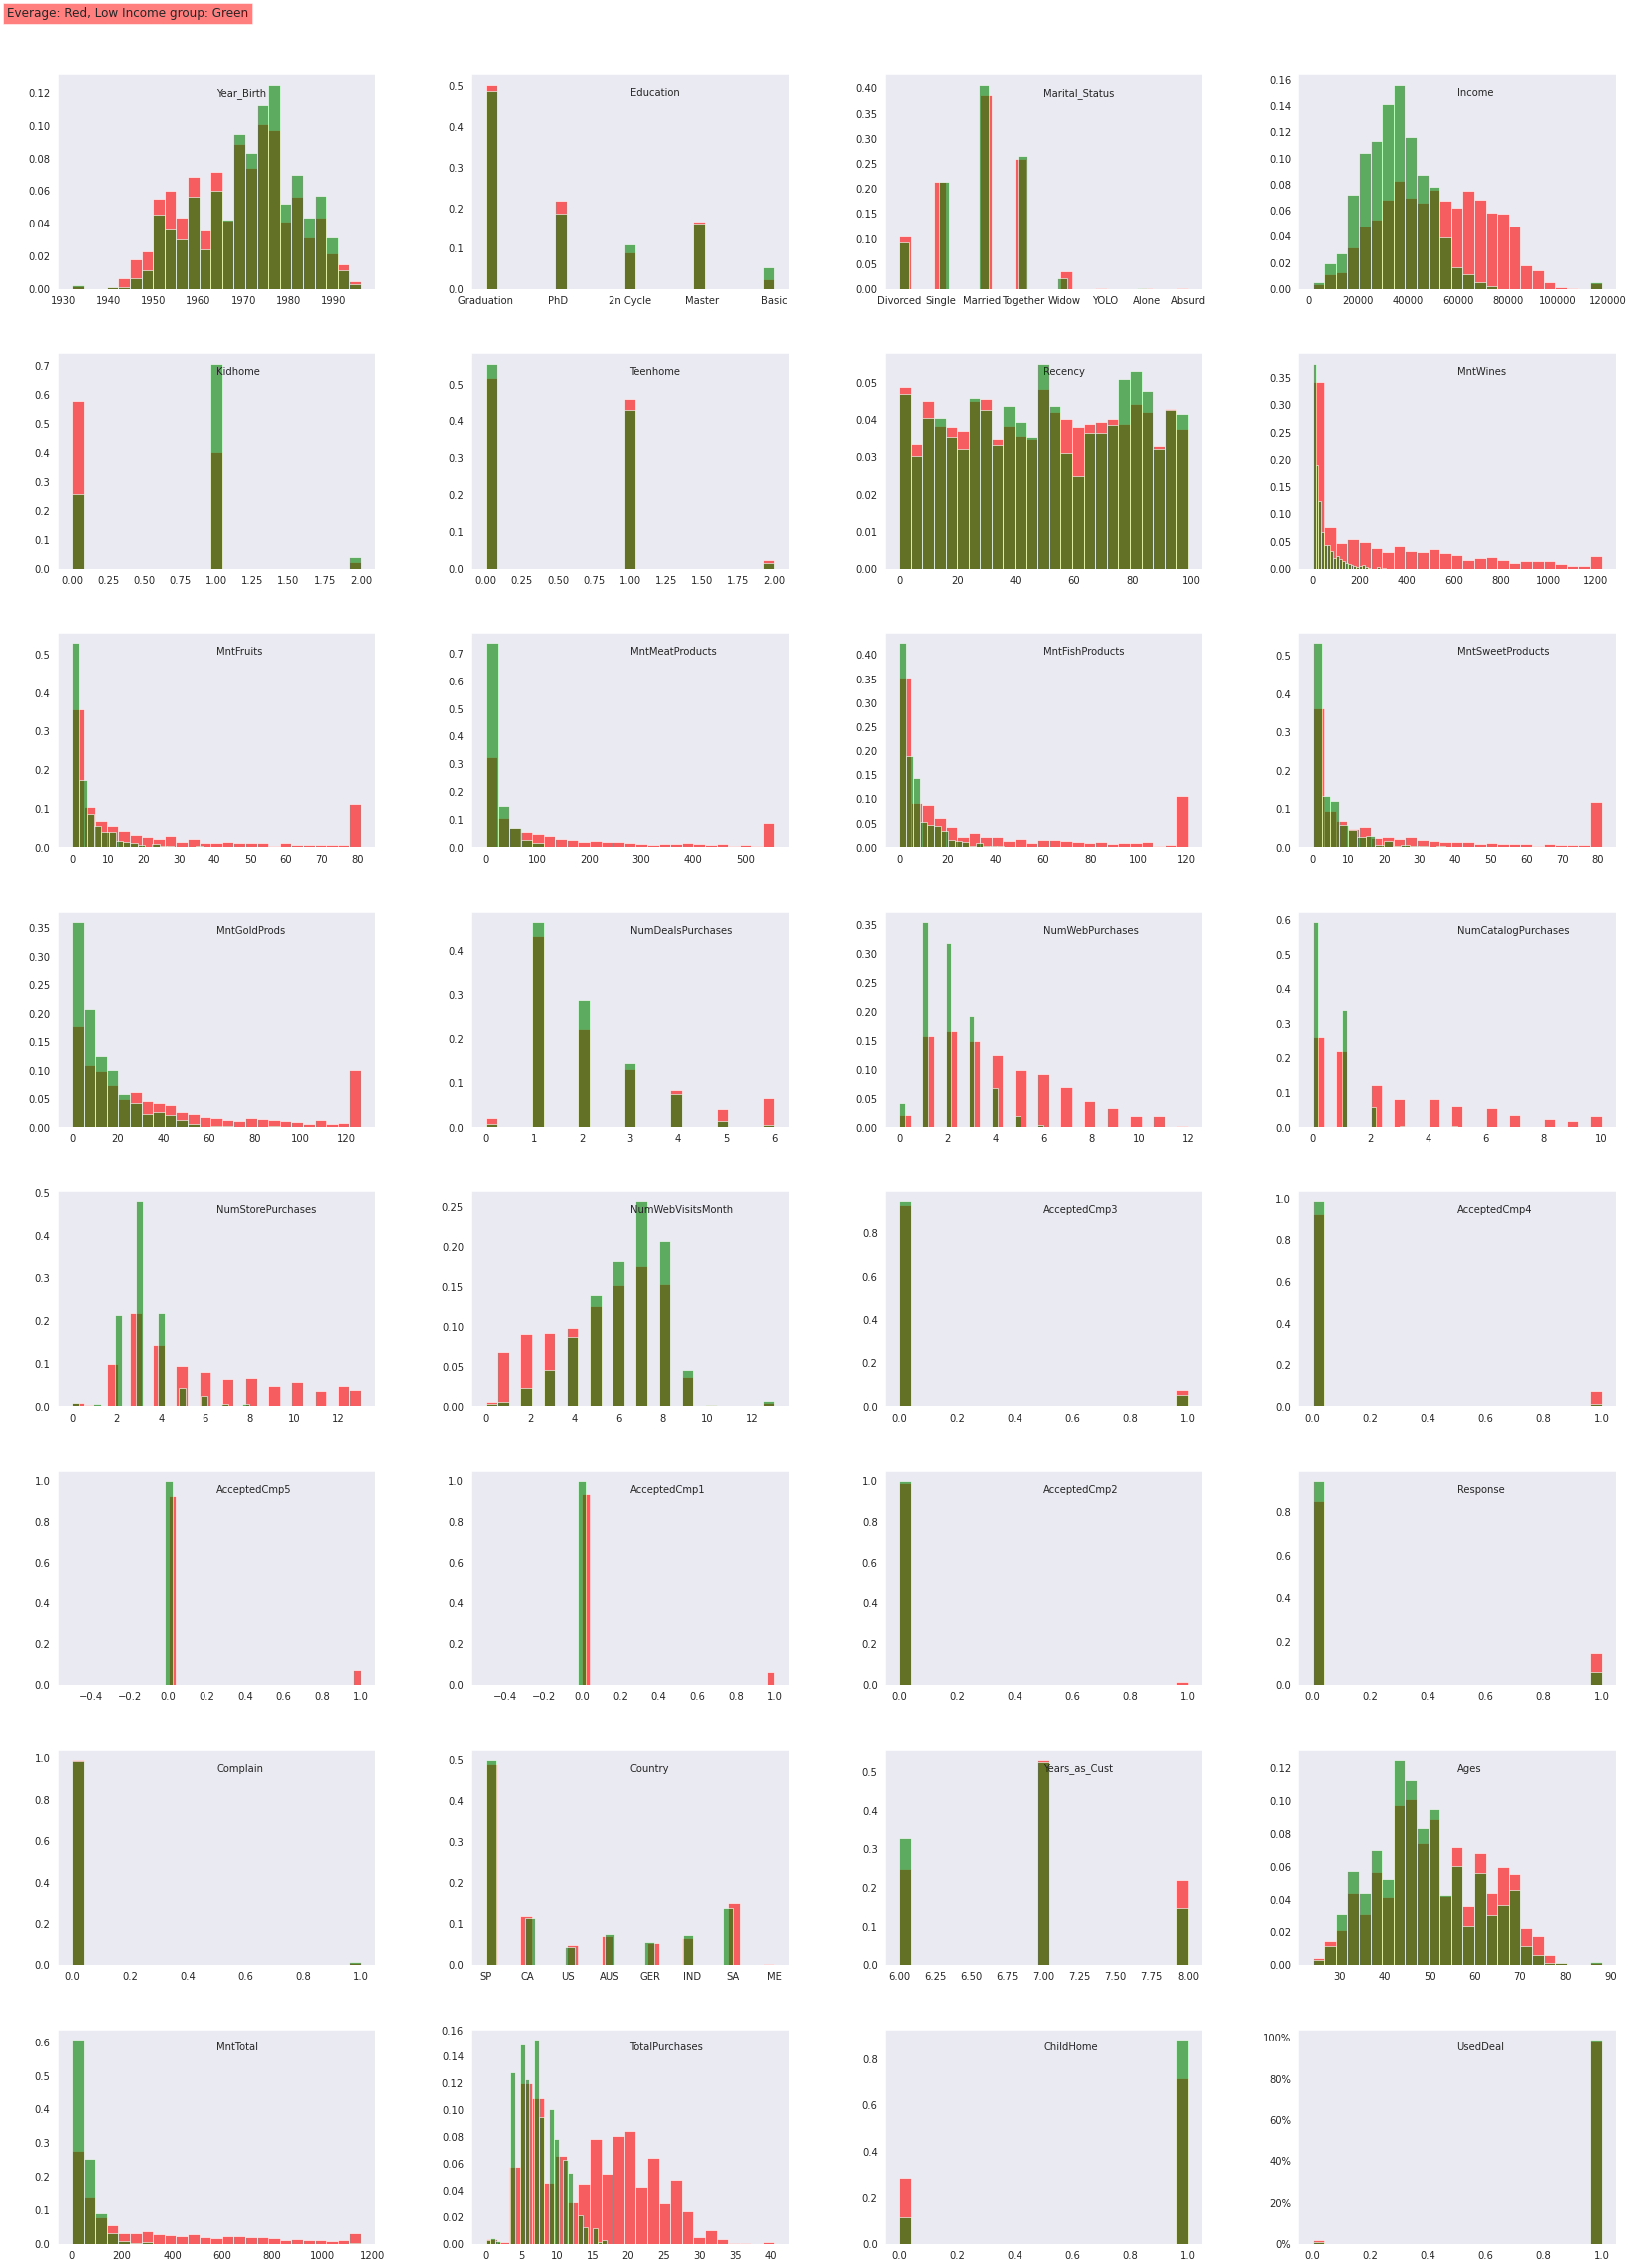

In [103]:
plt_a = mktdata.drop(['ID', 'Dt_Customer'], axis=1)
plt_b = mktdata_L.drop(['ID', 'Dt_Customer'], axis=1)


from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(8,4, figsize=(28, 40))
fig.subplots_adjust(hspace = .3, wspace=.3)

count = 0

for count, item in enumerate(axs.reshape(-1)):
  item.hist(plt_a.iloc[:,count], color = 'red',weights=np.ones(len(plt_a.iloc[:,count])) / len(plt_a.iloc[:,count]), bins=25, alpha=0.6, label=plt_a.columns[count])
  item.hist(plt_b.iloc[:,count], color = 'green',weights=np.ones(len(plt_b.iloc[:,count])) / len(plt_b.iloc[:,count]), bins=25, alpha=0.6, label=plt_b.columns[count])
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  #Title 
  item.text(0.5,0.9,plt_a.columns[count],transform=item.transAxes)

fig.text(0.1,0.9, 'Everage: Red, Low Income group: Green',fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

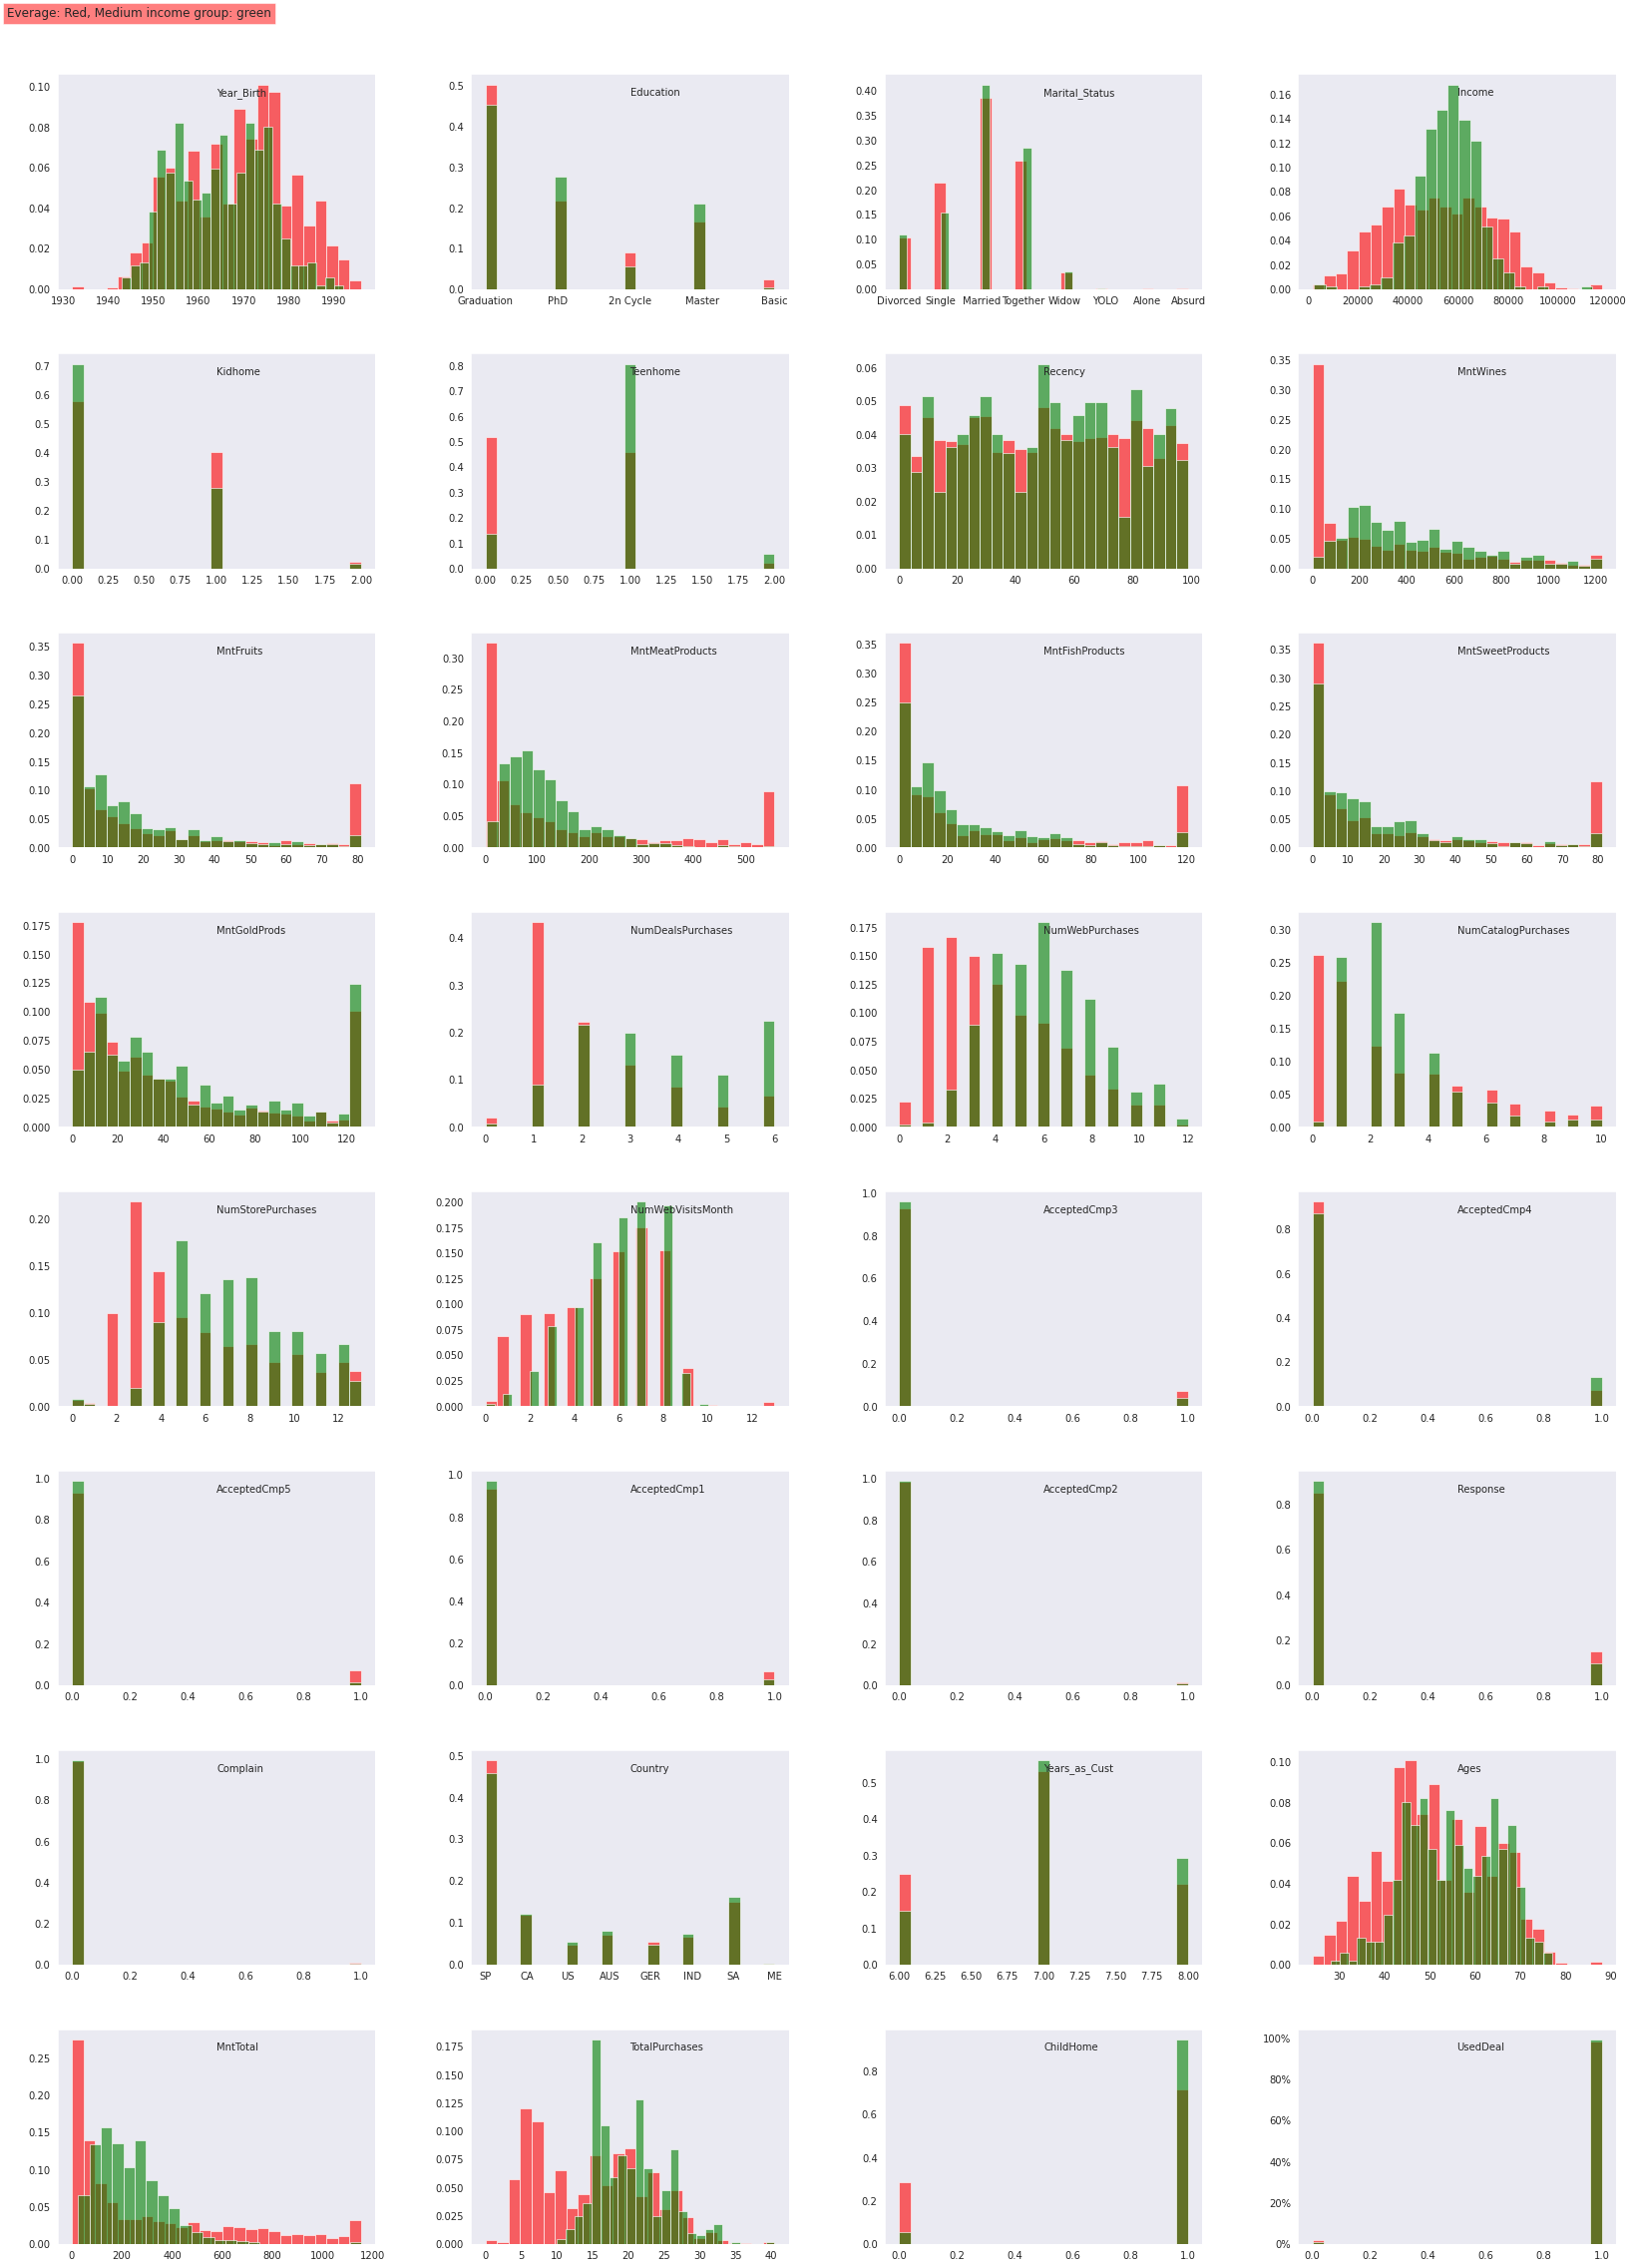

In [104]:
plt_a = mktdata.drop(['ID', 'Dt_Customer'], axis=1)
plt_b = mktdata_M.drop(['ID', 'Dt_Customer'], axis=1)


from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(8,4, figsize=(28, 40))
fig.subplots_adjust(hspace = .3, wspace=.3)

count = 0

for count, item in enumerate(axs.reshape(-1)):
  item.hist(plt_a.iloc[:,count], color = 'red',weights=np.ones(len(plt_a.iloc[:,count])) / len(plt_a.iloc[:,count]), bins=25, alpha=0.6, label=plt_a.columns[count])
  item.hist(plt_b.iloc[:,count], color = 'green',weights=np.ones(len(plt_b.iloc[:,count])) / len(plt_b.iloc[:,count]), bins=25, alpha=0.6, label=plt_b.columns[count])
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  #Title 
  item.text(0.5,0.9,plt_a.columns[count],transform=item.transAxes)

fig.text(0.1,0.9, 'Everage: Red, Medium income group: green',fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

Analytic questions to be answered:

1.	Are there any separated segments in customers' geography, number of purchased products and channels of purchases? How would each segment contribute to the success of the next campaign?
**==> Yes, we can segment our customers by income, amount of product purchased and the household with children or not. There are 3 groups: Hight income + loyal + have no children , middle income with medium amount of purchases + with children, and low income with low amount of purhases + with children.**

2.	Is there a significant relationship between geographical profile or purchase behaviour and the success of the next campaign? Can we predict the success rate?
**==> Yes we can by apply the Gradient Boosting Classifier model and predict the acceptance rate of the next campaign for each customer and also each group. The H&H group have the highest rate of response toward the next campaign while the M&M and L&L are not likely to repsonse. H&H group tend to buy more grocery stuff from us such as meat, fruits, fish but they do not purchase much gold from us and they have the lowest rate of using deal in their purchases **





# ROC curves plotting.  

In [105]:
from sklearn import datasets
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [106]:
false_positive_rate_lored, true_positive_rate_lored, threshold_lored = roc_curve(y_test, y_pred_lored)
false_positive_rate_maxtree, true_positive_rate_maxtree, threshold_maxtree = roc_curve(y_test, y_pred_maxtree)
false_positive_rate_optree, true_positive_rate_optree, threshold_optree = roc_curve(y_test, y_pred_optree)
false_positive_rate_GBC, true_positive_rate_GBC, threshold_GBC = roc_curve(y_test, y_pred_GBC)
false_positive_rate_hgb, true_positive_rate_hgb, threshold_hgb = roc_curve(y_test, y_pred_hgb)
false_positive_rate_24logit, true_positive_rate_24logit, threshold_24logit = roc_curve(y_test, y_pred_24logit)


In [107]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_pred_lored))
print('roc_auc_score for Maximal Tree: ', roc_auc_score(y_test, y_pred_maxtree))
print('roc_auc_score for Optimal Tree: ', roc_auc_score(y_test, y_pred_optree))
print('roc_auc_score for Gradient Boosting Classifer: ', roc_auc_score(y_test, y_pred_GBC))
print('roc_auc_score for Hyperparameter GBC: ', roc_auc_score(y_test, y_pred_hgb))
print('roc_auc_score for Logistic Regression with 24 features: ', roc_auc_score(y_test, y_pred_24logit))




roc_auc_score for Logistic Regression:  0.7019873353929752
roc_auc_score for Maximal Tree:  0.6673130436687921
roc_auc_score for Optimal Tree:  0.6486009772343829
roc_auc_score for Gradient Boosting Classifer:  0.6619557834308376
roc_auc_score for Hyperparameter GBC:  0.6666338000394401
roc_auc_score for Logistic Regression with 24 features:  0.7009027366944937


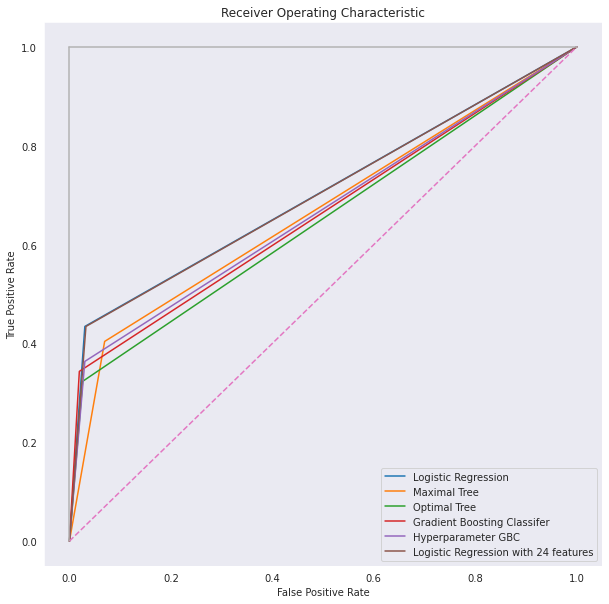

In [108]:
#Plot the curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_lored, true_positive_rate_lored)
plt.plot(false_positive_rate_maxtree, true_positive_rate_maxtree)
plt.plot(false_positive_rate_optree, true_positive_rate_optree)
plt.plot(false_positive_rate_GBC, true_positive_rate_GBC)
plt.plot(false_positive_rate_hgb, true_positive_rate_hgb)
plt.plot(false_positive_rate_24logit, true_positive_rate_24logit)

plt.legend(['Logistic Regression', 'Maximal Tree', 'Optimal Tree', 'Gradient Boosting Classifer', 'Hyperparameter GBC', 'Logistic Regression with 24 features' ])

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# **4. Conclusion and Recommendation**

1. H&H group are most likely to respond to the new campaign based on the prediction, while group L&L is less likely to respond 
We need to shift our focus to H&H group instead of L&L group

2. L&L group are most likely to say no and they significantly and negatively affected the total acceptance rate in the previous campaigns.
We should not target the L&L group in the next campaign 

3. The customers who are married or stay together with spouse or living in a household with kids are significantly and negatively affect the total acceptance rate
 We should not target on the customers who are married or stay together with spouse or living in a household with kids

4. It seems like the higher education the higher rate of responses 
we should focus more on the higher education group

5. We should also focus on the customers that previously say “yes” to campaigns 3 and 5 and of course, the more loyal they are, the more possibility they would say “yes” to our next campaign.
